In [2]:
#importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy
from scipy.stats import entropy
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM
import plotly.express as px
import plotly.graph_objects as go
import optuna
from scipy.fftpack import fftfreq

In [3]:
df = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24')

In [4]:
df = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24', sep='\t')
df

,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
0,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
1,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
2,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
3,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
4,-0.232,-0.061,-0.281,-0.125,0.046,-0.088,-0.078,-0.078
...,...,...,...,...,...,...,...,...
20474,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20475,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20476,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20477,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


Data Path

In [5]:
dataset_path_1st = 'C:/Users/Aeesha/DissProject/mlbearing/notebook/bearing/1st_test/1st_test'


In [6]:
files = os.listdir('C:/Users/Aeesha/DissProject/mlbearing/notebook/bearing/1st_test/1st_test')
file_head = files[:12]  # Change the number to specify the desired number of files

df = pd.DataFrame(file_head, columns=["File Name"])
print(df.head(8))

             File Name
0  2003.10.22.12.06.24
1  2003.10.22.12.09.13
2  2003.10.22.12.14.13
3  2003.10.22.12.19.13
4  2003.10.22.12.24.13
5  2003.10.22.12.29.13
6  2003.10.22.12.34.13
7  2003.10.22.12.39.13


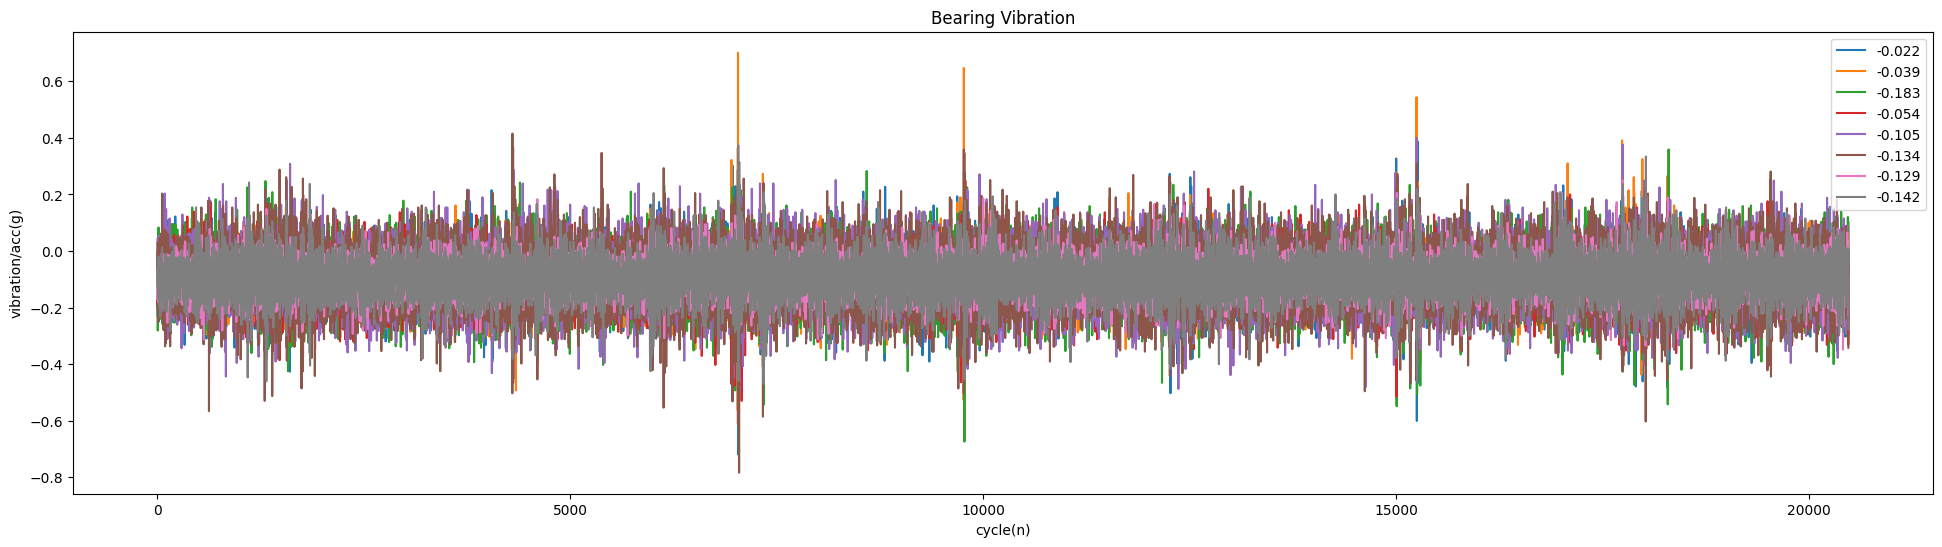

In [7]:
# Test for the first file
dataset = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acc(g)")
plt.show()


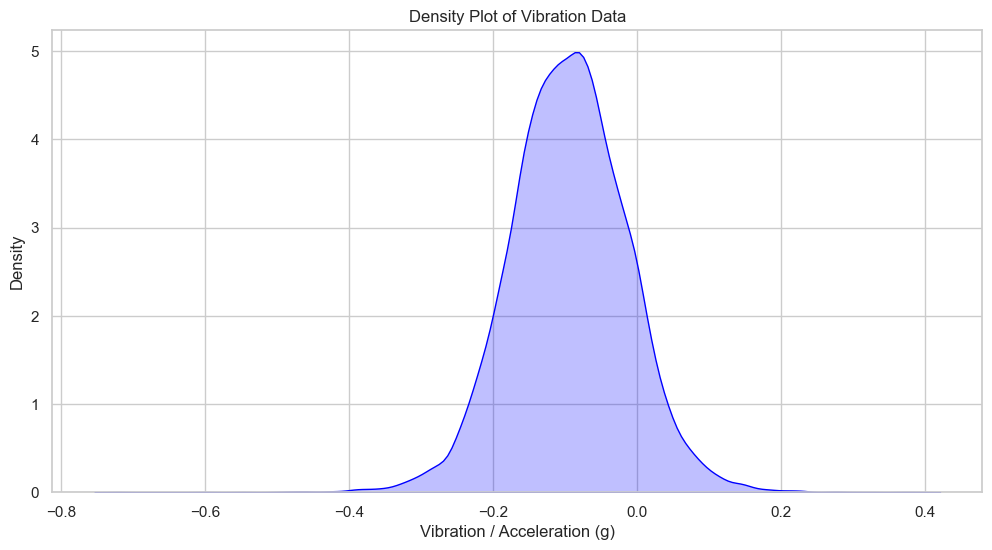

In [130]:
#DENSITY PLOT
dataset = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24', sep='\t', header=None)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a density plot for the first vibration data column
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset.iloc[:, 0], color="blue", shade=True)
plt.xlabel("Vibration / Acceleration (g)")
plt.ylabel("Density")
plt.title("Density Plot of Vibration Data")
plt.show()

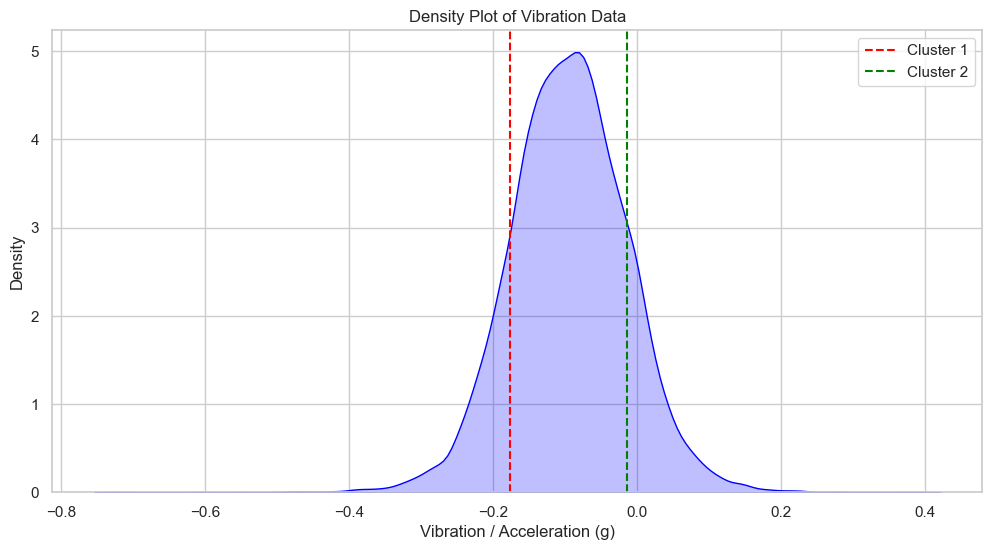

In [131]:
dataset = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24', sep='\t', header=None)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a density plot for the first vibration data column
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset.iloc[:, 0], color="blue", shade=True)
plt.xlabel("Vibration / Acceleration (g)")
plt.ylabel("Density")
plt.title("Density Plot of Vibration Data")

# Calculate mean and standard deviation for clustering
mean_value = dataset.iloc[:, 0].mean()
std_deviation = dataset.iloc[:, 0].std()

# Add vertical dashed lines for clusters
plt.axvline(x=mean_value - std_deviation, color="red", linestyle="--", label="Cluster 1")
plt.axvline(x=mean_value + std_deviation, color="green", linestyle="--", label="Cluster 2")

# Show the legend
plt.legend()

plt.show()

In [120]:
dataset = pd.read_csv('bearing/1st_test/1st_test/2003.10.22.12.06.24', sep='\t')
dataset.head()

,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
0,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
1,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
2,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
3,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
4,-0.232,-0.061,-0.281,-0.125,0.046,-0.088,-0.078,-0.078


In [121]:
dataset.describe()

,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
count,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000
mean,-0.094596,-0.093883,-0.093812,-0.093753,-0.090811,-0.090879,-0.090967,-0.094233
std,0.081124,0.070651,0.090650,0.077511,0.091465,0.095490,0.060087,0.066382
min,-0.720000,-0.564000,-0.674000,-0.530000,-0.496000,-0.784000,-0.413000,-0.471000
25%,-0.146000,-0.139000,-0.156000,-0.146000,-0.151000,-0.154000,-0.129000,-0.134000
50%,-0.095000,-0.093000,-0.093000,-0.093000,-0.090000,-0.090000,-0.090000,-0.095000
75%,-0.042000,-0.049000,-0.032000,-0.042000,-0.029000,-0.029000,-0.054000,-0.054000
max,0.388000,0.701000,0.359000,0.256000,0.400000,0.415000,0.249000,0.374000


**Feature Extraction**

In this section several signal-based statistical features has been extracted from the data

In [28]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result


In [29]:
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']

    # initialize
    # Adding columns name for time features
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)



    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs

        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])

        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])

        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename]

        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = pd.concat([data, merge])

    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]

    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data

#Calling feature extraction function defined above to merge extracted features.

In [30]:
#Saving as .csv file
setNo1 = time_features(dataset_path_1st, id_set=1)
setNo1.to_csv('setNo1_timefeatures.csv')

In [72]:
setNo1 = pd.read_csv("./setNo1_timefeatures.csv") #Reading the data again


In [101]:
#Changing indexing column to time which is also name of the each file
#setNo1 = setNo1.rename(columns={'Unnamed: 0':'time'})
setNo1.set_index('time')
setNo1.describe()
setNo1.head()

,time,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
0,2003-10-22 12:06:24,0.104148,0.081124,-0.029900,1.069800,4.803057,0.124617,0.720,1.108,5.777714,...,0.046532,0.790686,4.607008,0.109019,0.413,0.662,3.788316,0.085565,1.149963,4.356424
1,2003-10-22 12:09:13,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,5.282223,...,0.085152,1.235094,4.590646,0.108900,0.420,0.796,3.856749,0.086097,1.145471,4.417794
2,2003-10-22 12:14:13,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,4.974097,...,0.009628,0.925042,4.602957,0.110320,0.396,0.657,3.589548,0.086970,1.147284,4.118232
3,2003-10-22 12:19:13,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,4.776357,...,-0.037240,0.652947,4.604434,0.111038,0.393,0.591,3.539320,0.087623,1.146925,4.059336
4,2003-10-22 12:24:13,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,4.959370,...,0.036435,0.635987,4.594110,0.110189,0.376,0.591,3.412315,0.087316,1.143544,3.902132


In [102]:
# Remove columns containing '_y'
columns_to_remove = [col for col in setNo1.columns if '_y' in col]
setNo1 = setNo1.drop(columns=columns_to_remove)

# Rename columns by removing '_x'
setNo1.columns = [col.replace('_x', '') for col in setNo1.columns]



In [114]:
# Rename the DataFrame
set1 = setNo1.copy()
set1 = set1.rename(columns={'Unnamed: 0': 'time'})  # Rename the first column to 'time'
set1 = set1.set_index('time')  # Set 'time' as the index column

# Save the modified DataFrame to CSV
set1.to_csv('set1_timefeatures.csv')

# Display summary statistics and the first few rows of the modified DataFrame
print(set1.describe())
print(set1.head())

           B1_mean       B1_std      B1_skew  B1_kurtosis   B1_entropy  \
count  2156.000000  2156.000000  2156.000000  2156.000000  2156.000000   
mean      0.127485     0.098575    -0.038621     0.998634     4.981065   
std       0.006072     0.005345     0.030224     0.197405     0.074409   
min       0.103651     0.079417    -0.137060     0.279887     4.507776   
25%       0.127830     0.096967    -0.058600     0.868275     4.936962   
50%       0.128906     0.099051    -0.038491     0.996362     4.983200   
75%       0.129829     0.101153    -0.017578     1.124417     5.027213   
max       0.142147     0.129748     0.071573     1.700413     5.304080   

            B1_rms       B1_max       B1_p2p     B1_crest  B1_clearence  ...  \
count  2156.000000  2156.000000  2156.000000  2156.000000   2156.000000  ...   
mean      0.152221     0.726346     1.177997     4.774991      0.111784  ...   
std       0.007184     0.079033     0.107634     0.500902      0.005428  ...   
min       0.1

In [115]:
set1 = pd.read_csv("./set1_timefeatures.csv") #Reading the data again


**Plotting features of all bearings in x axis**

bearing detail ['B1', 'B2', 'B3', 'B4']


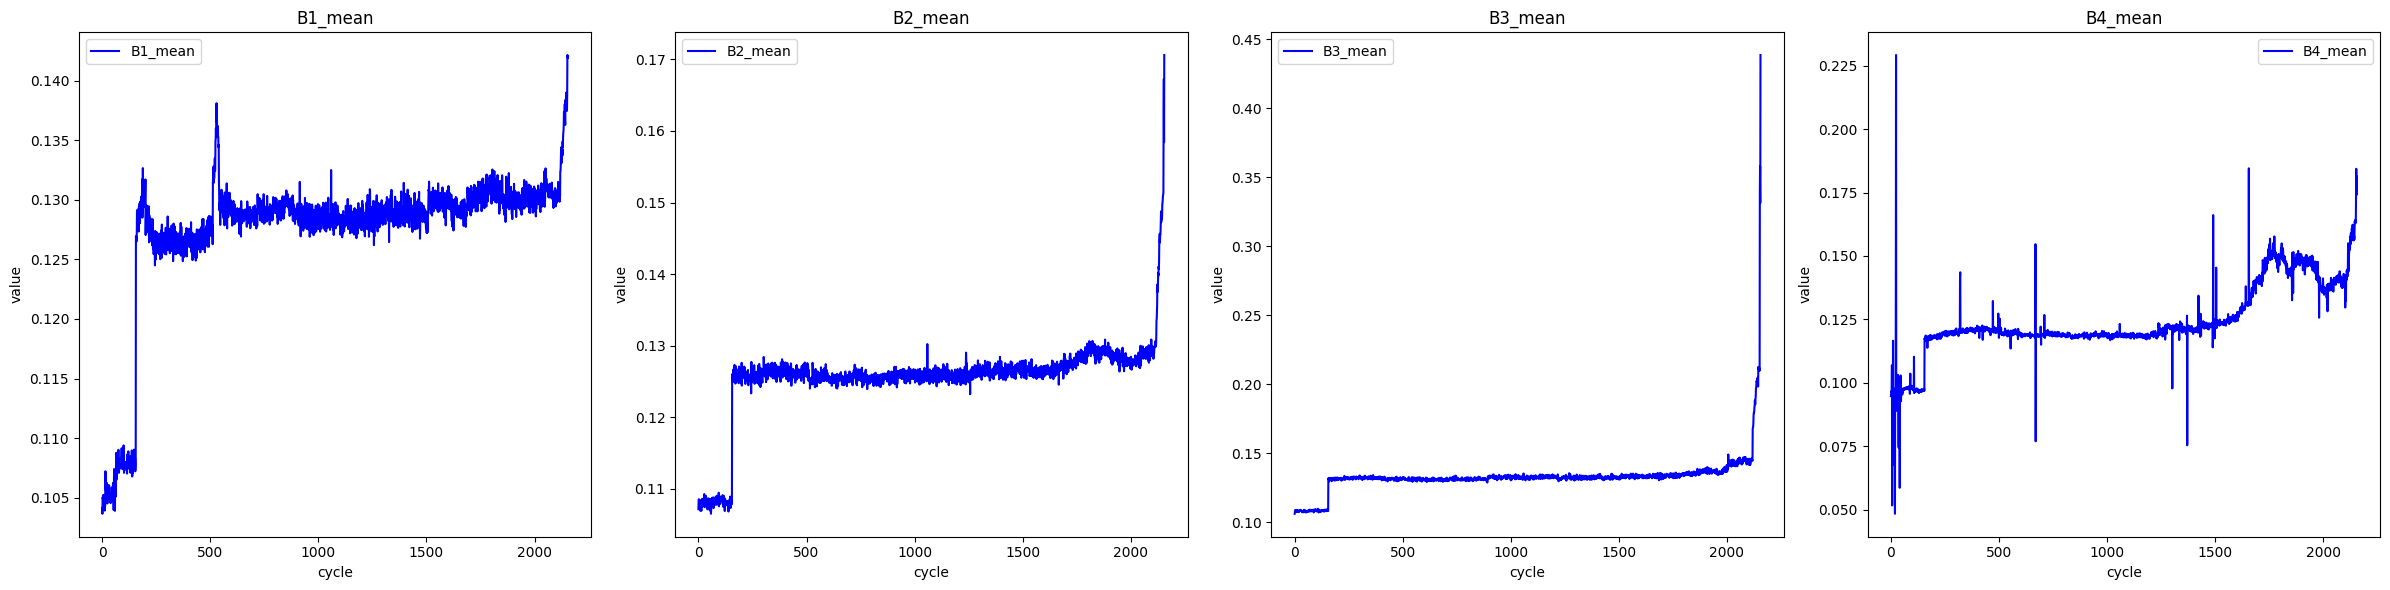

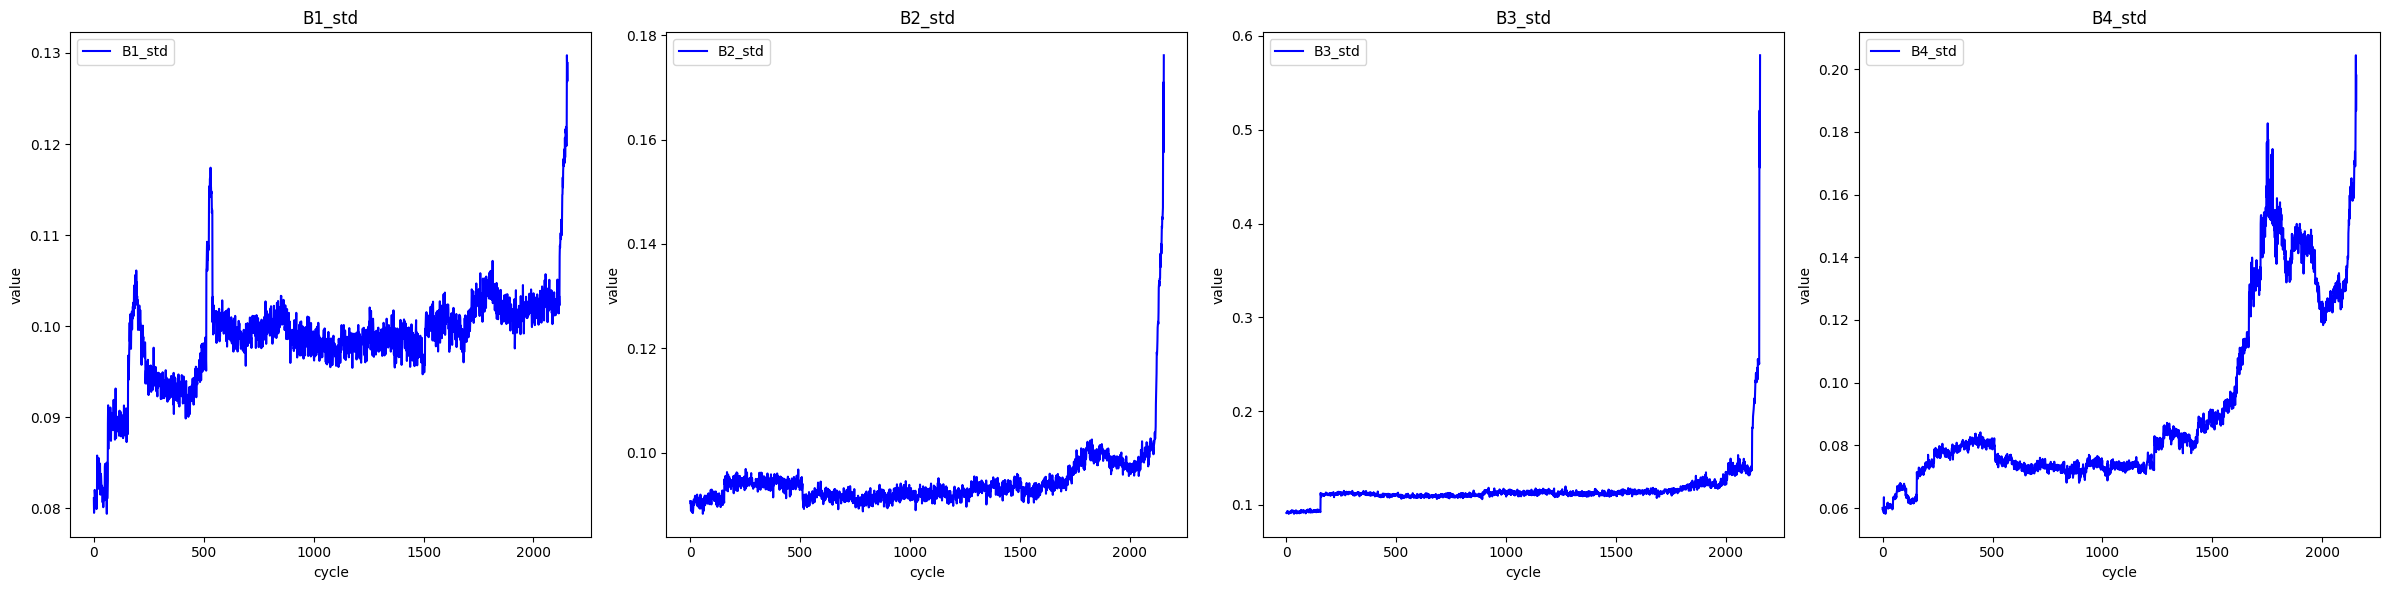

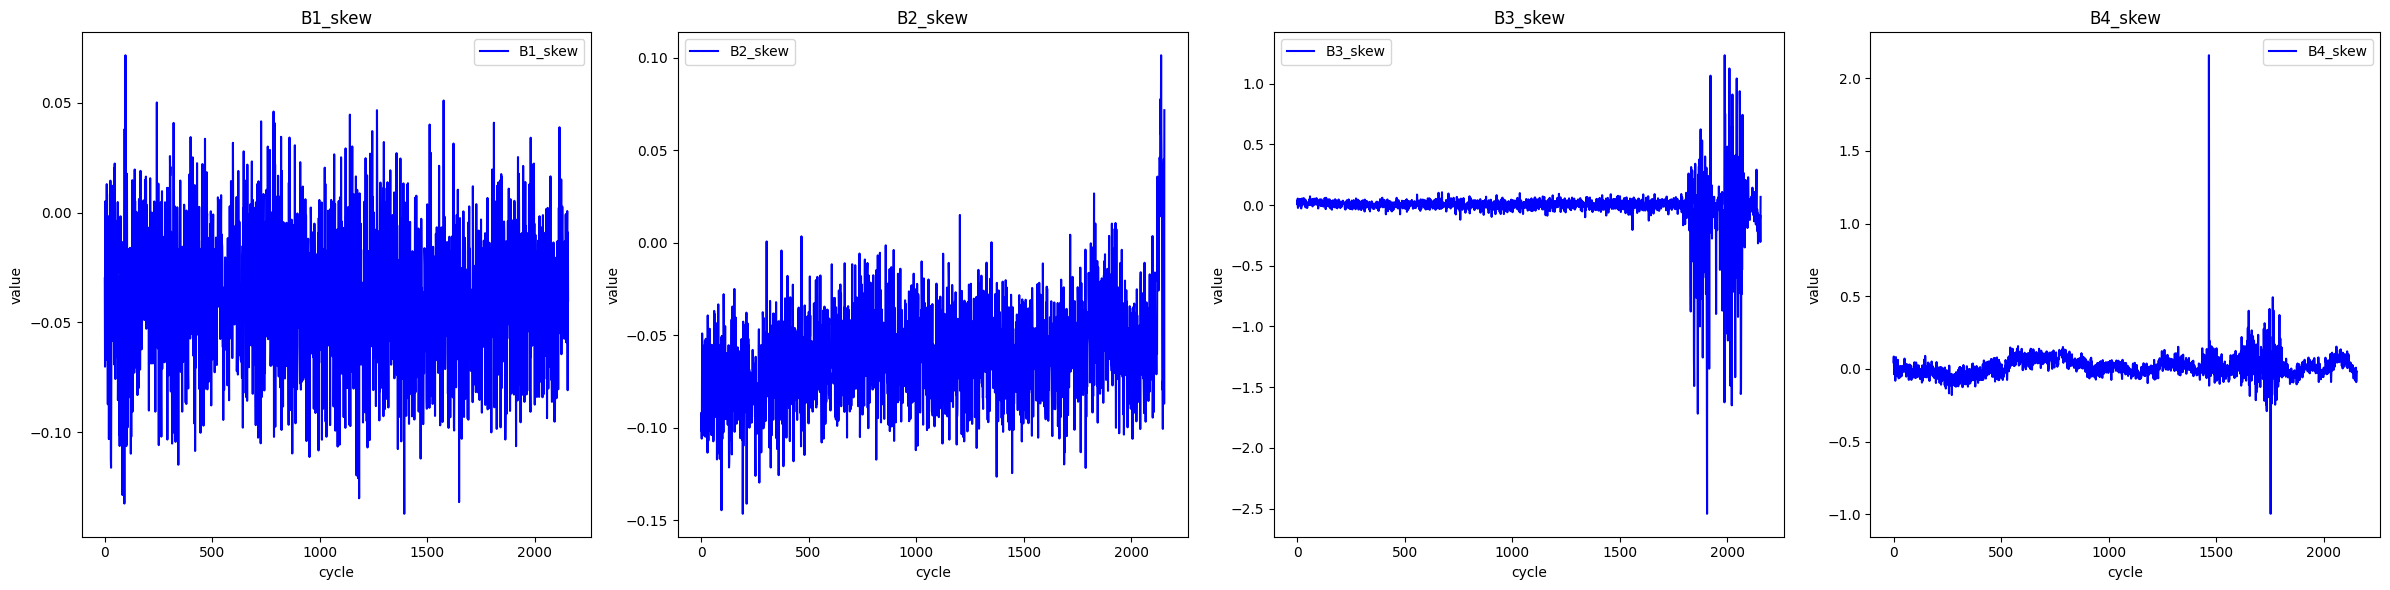

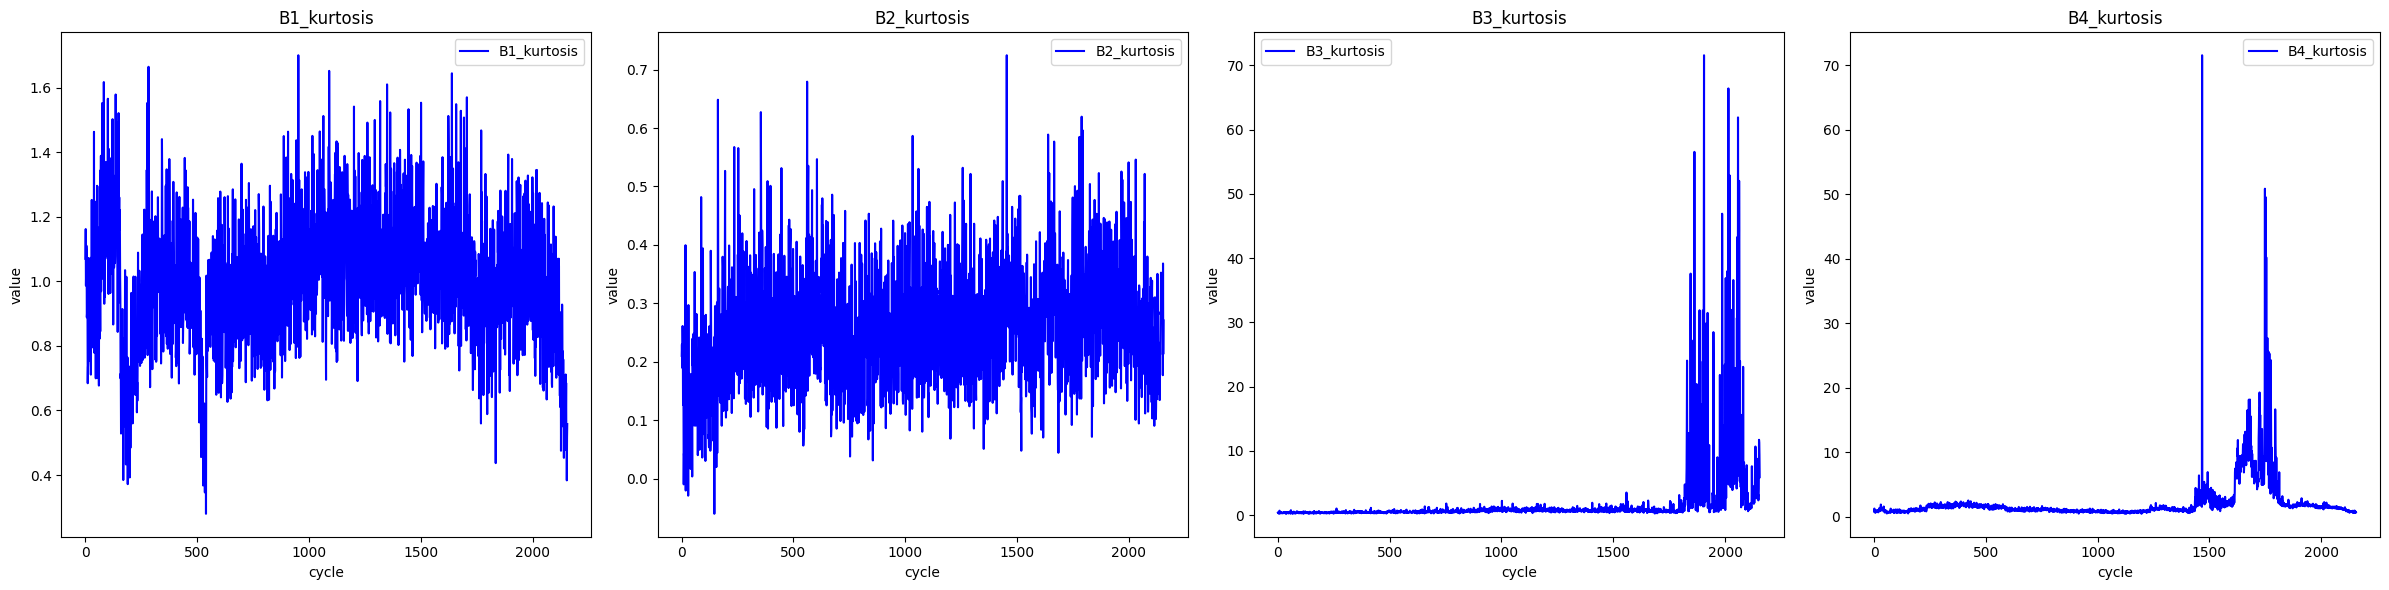

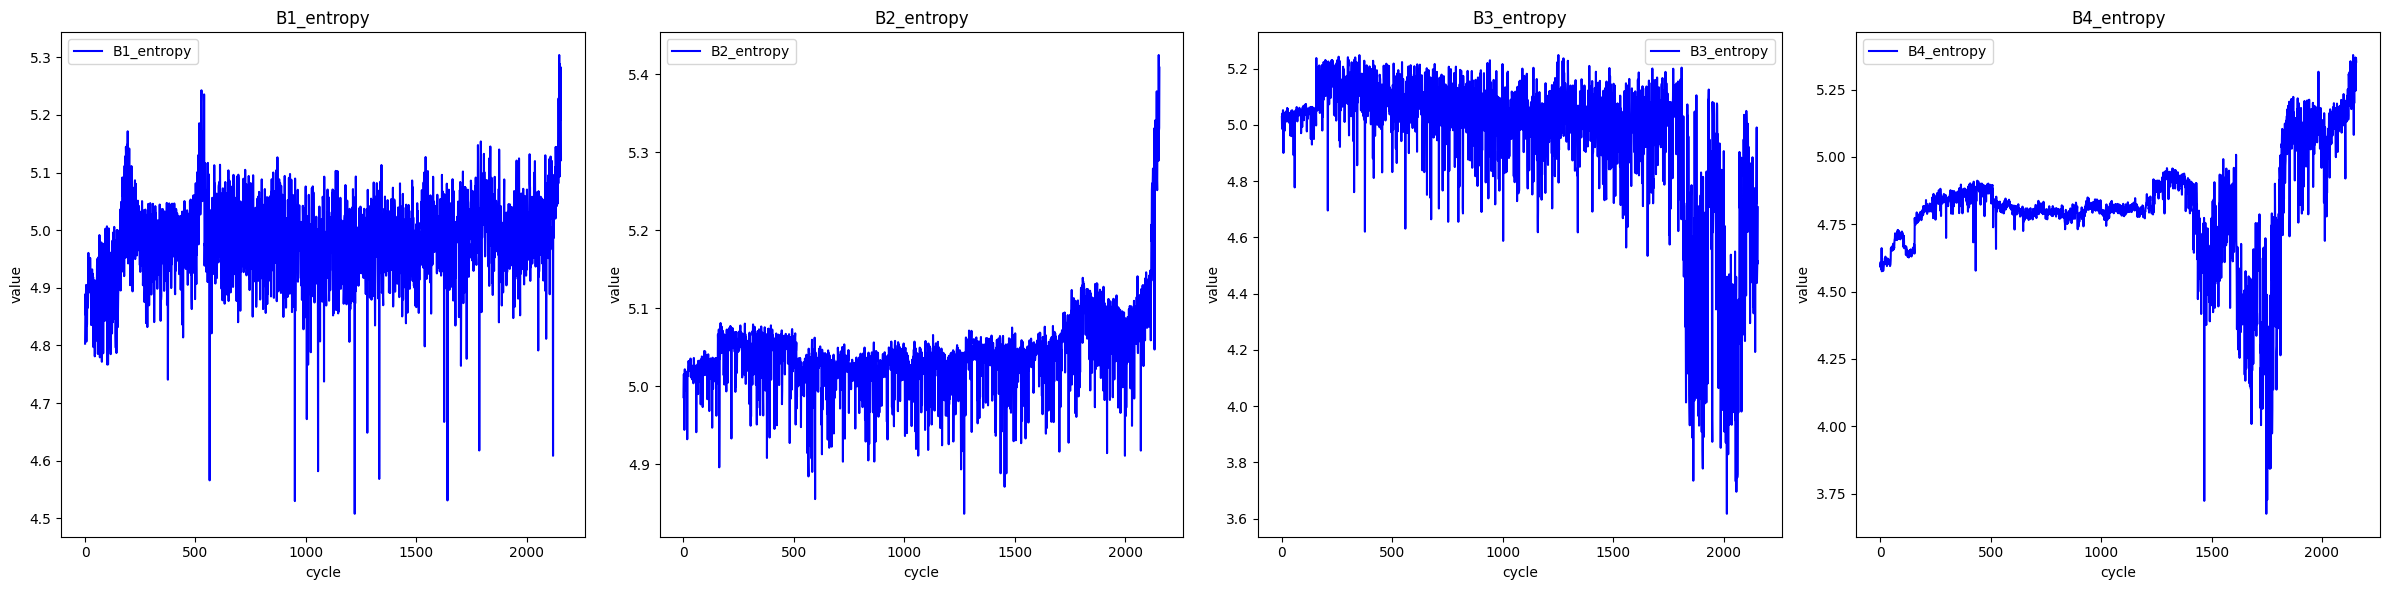

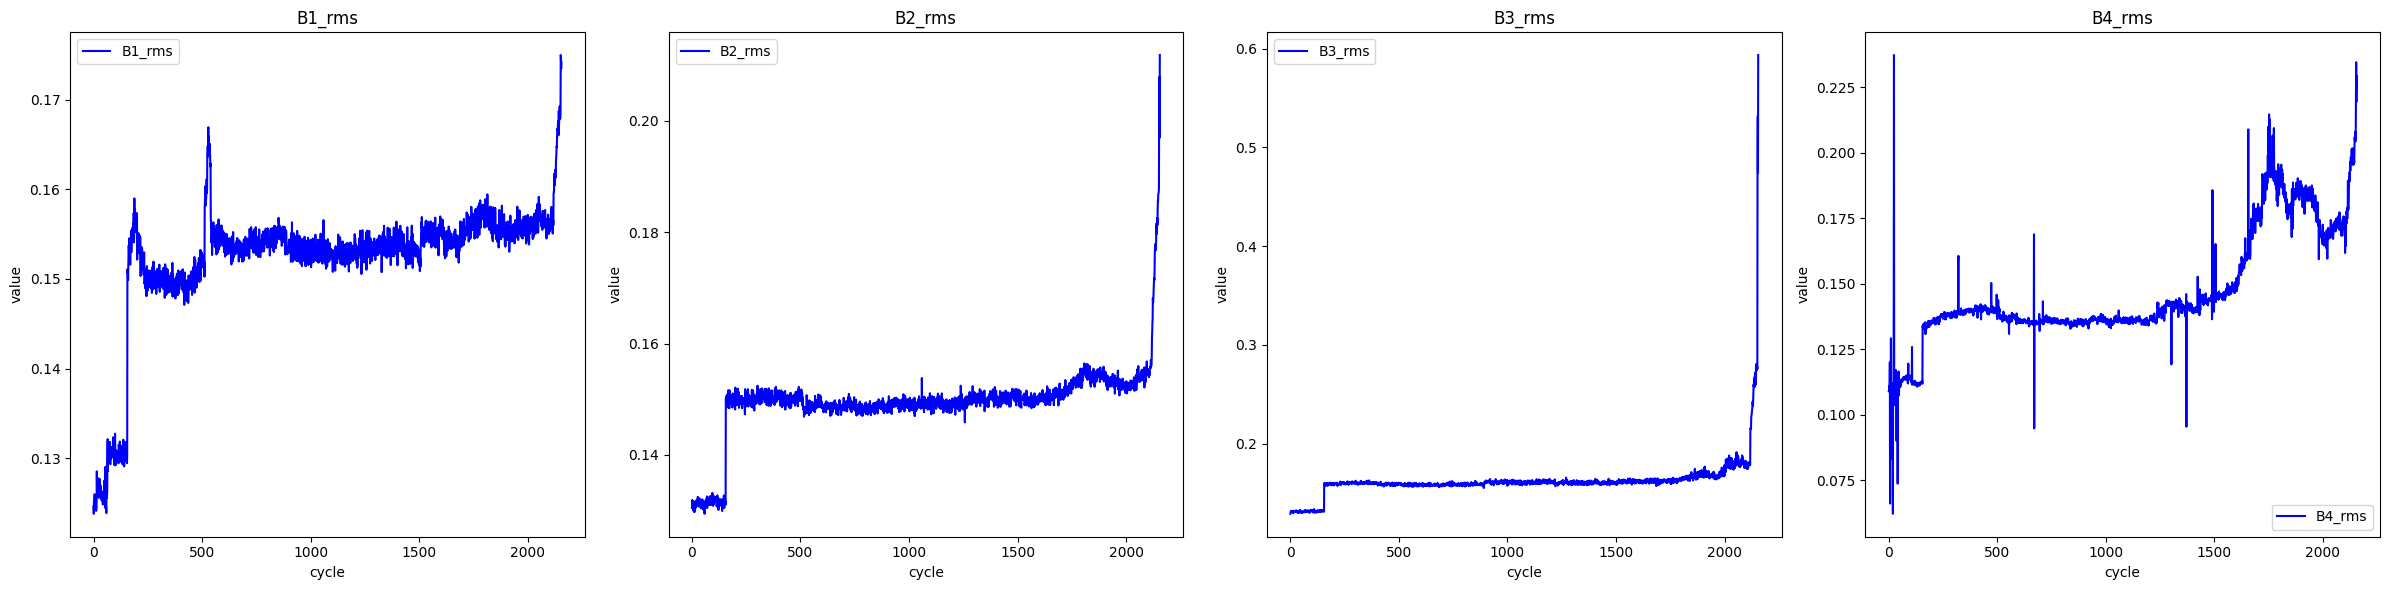

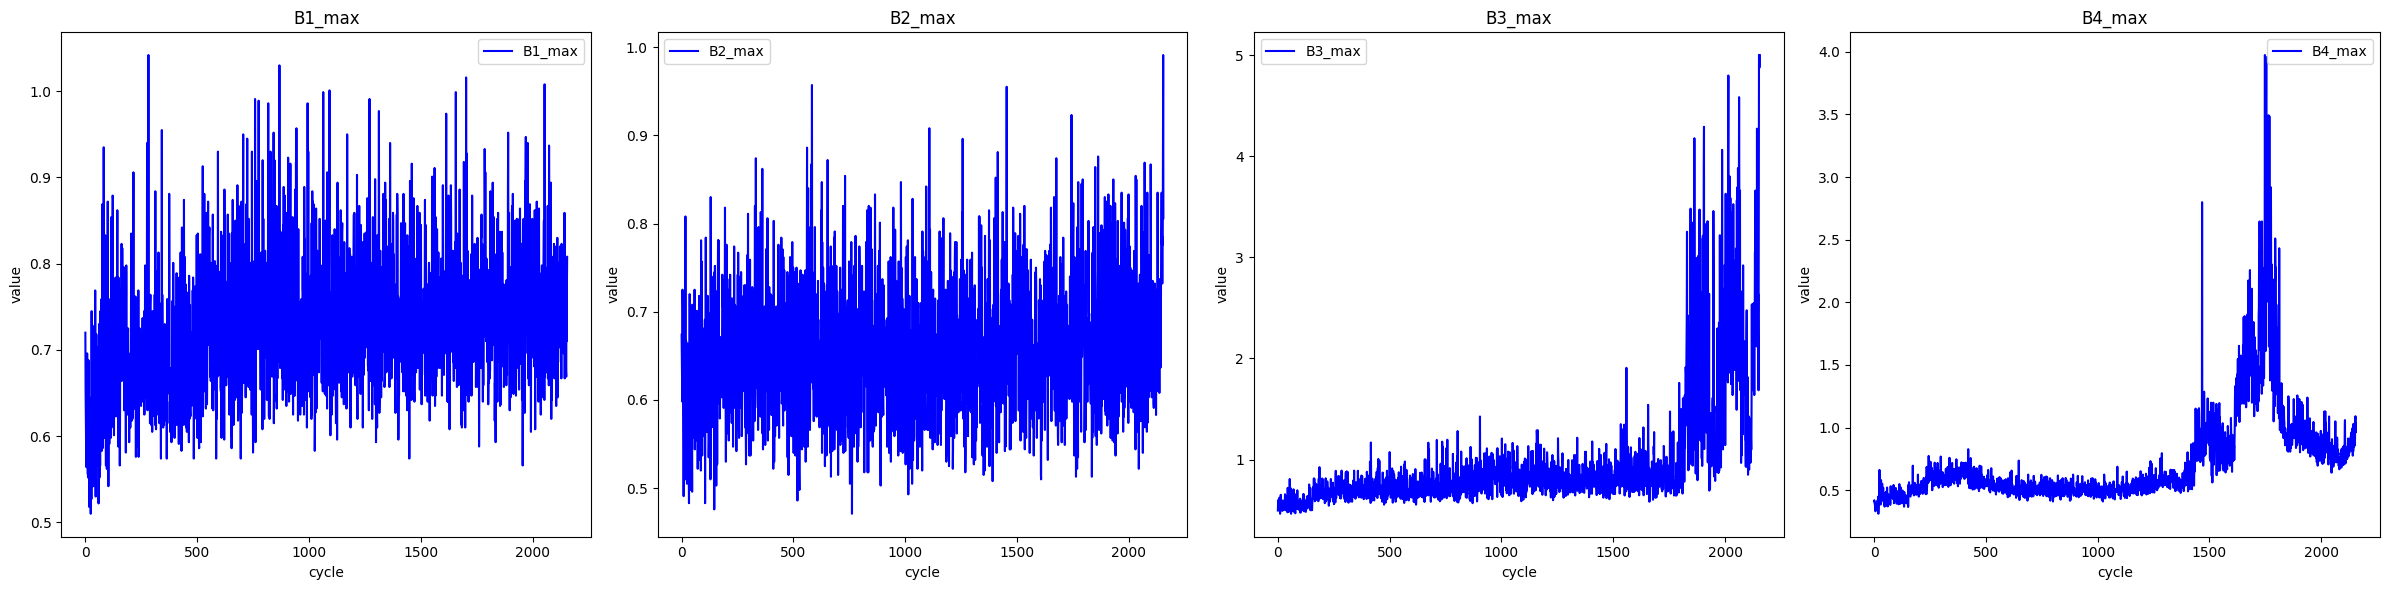

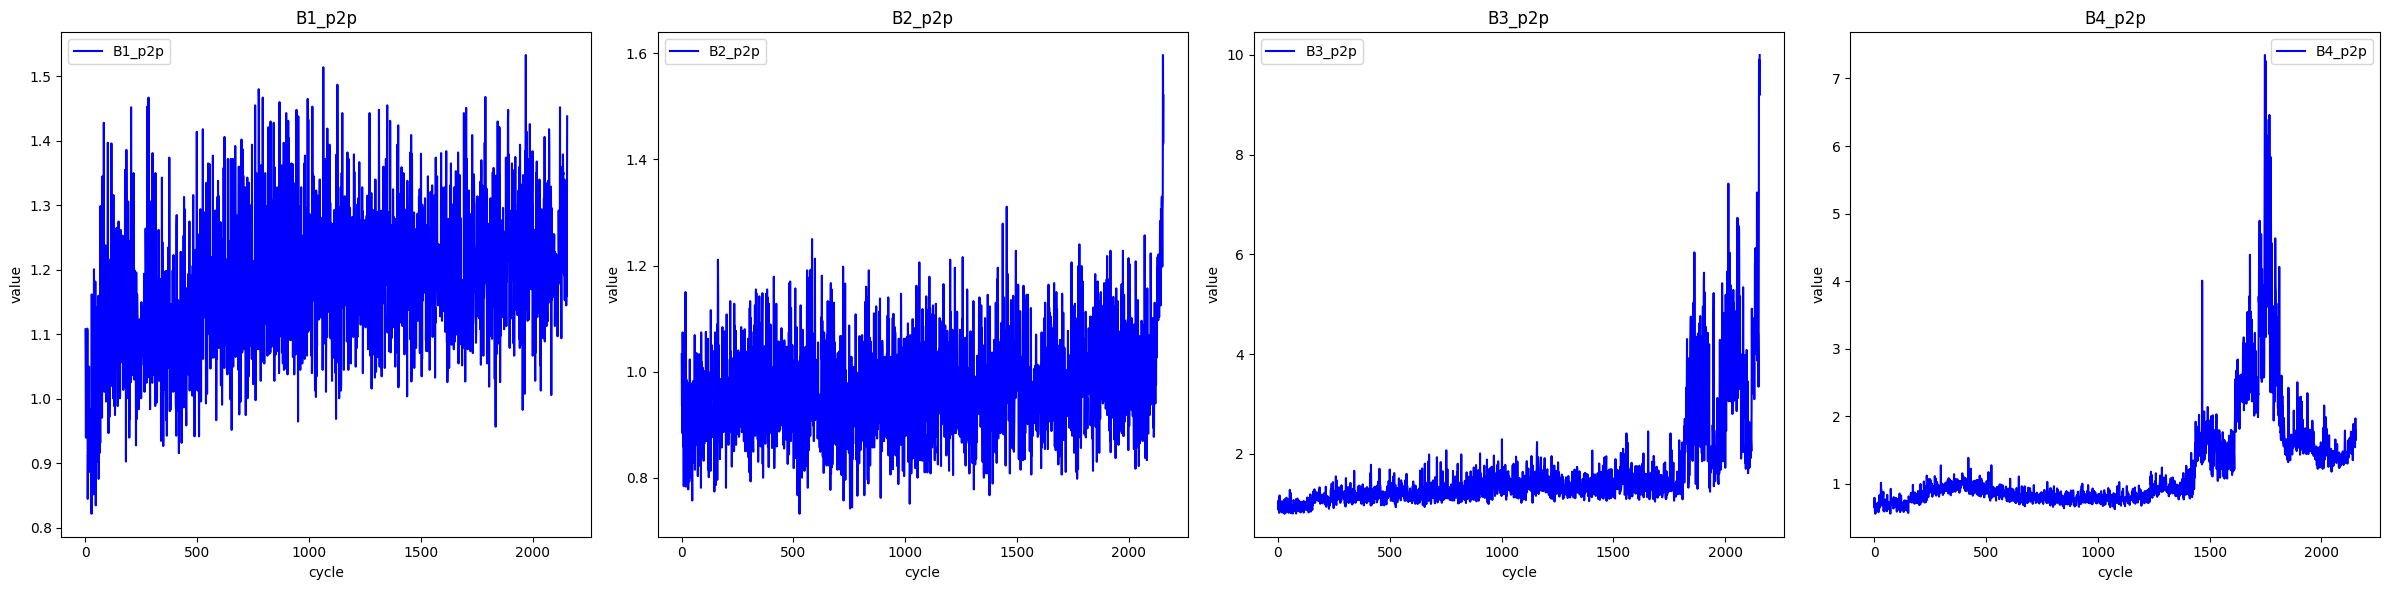

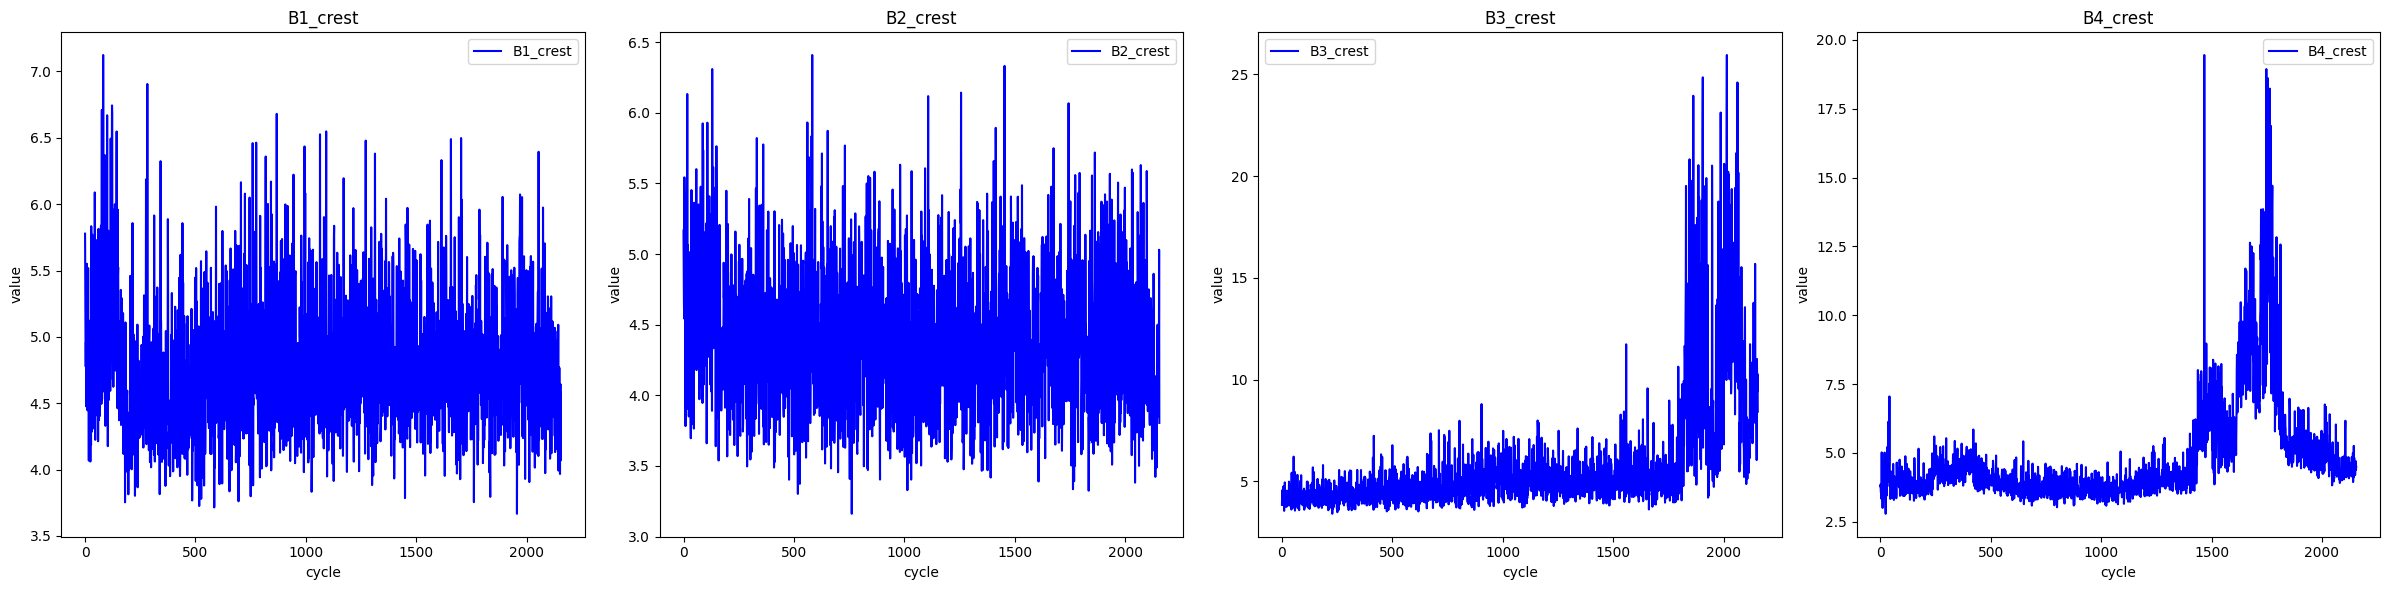

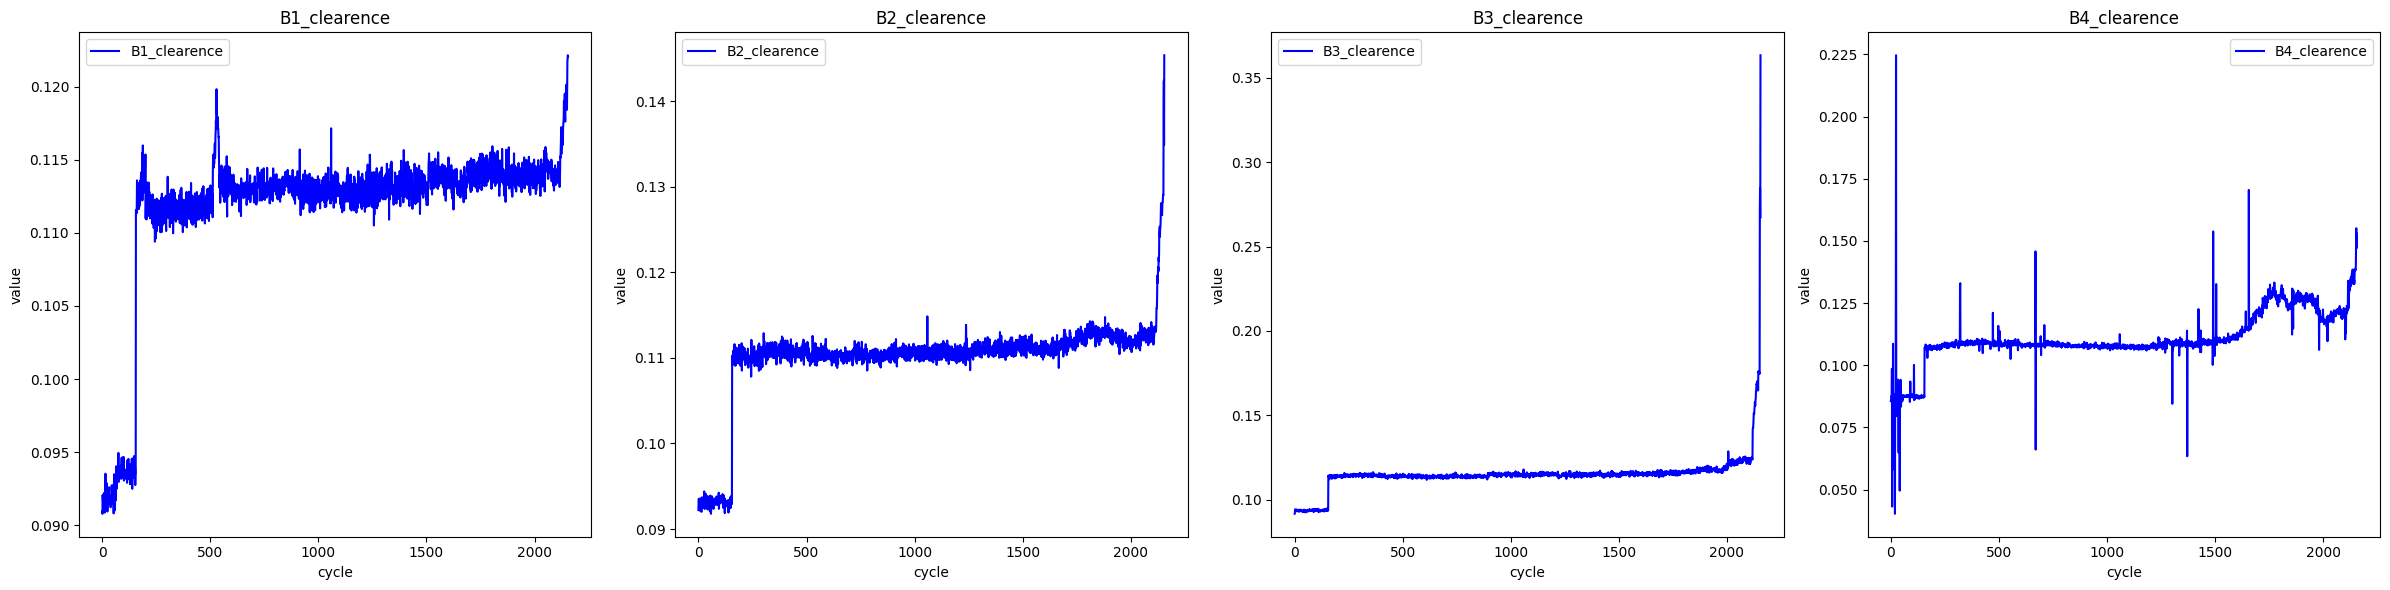

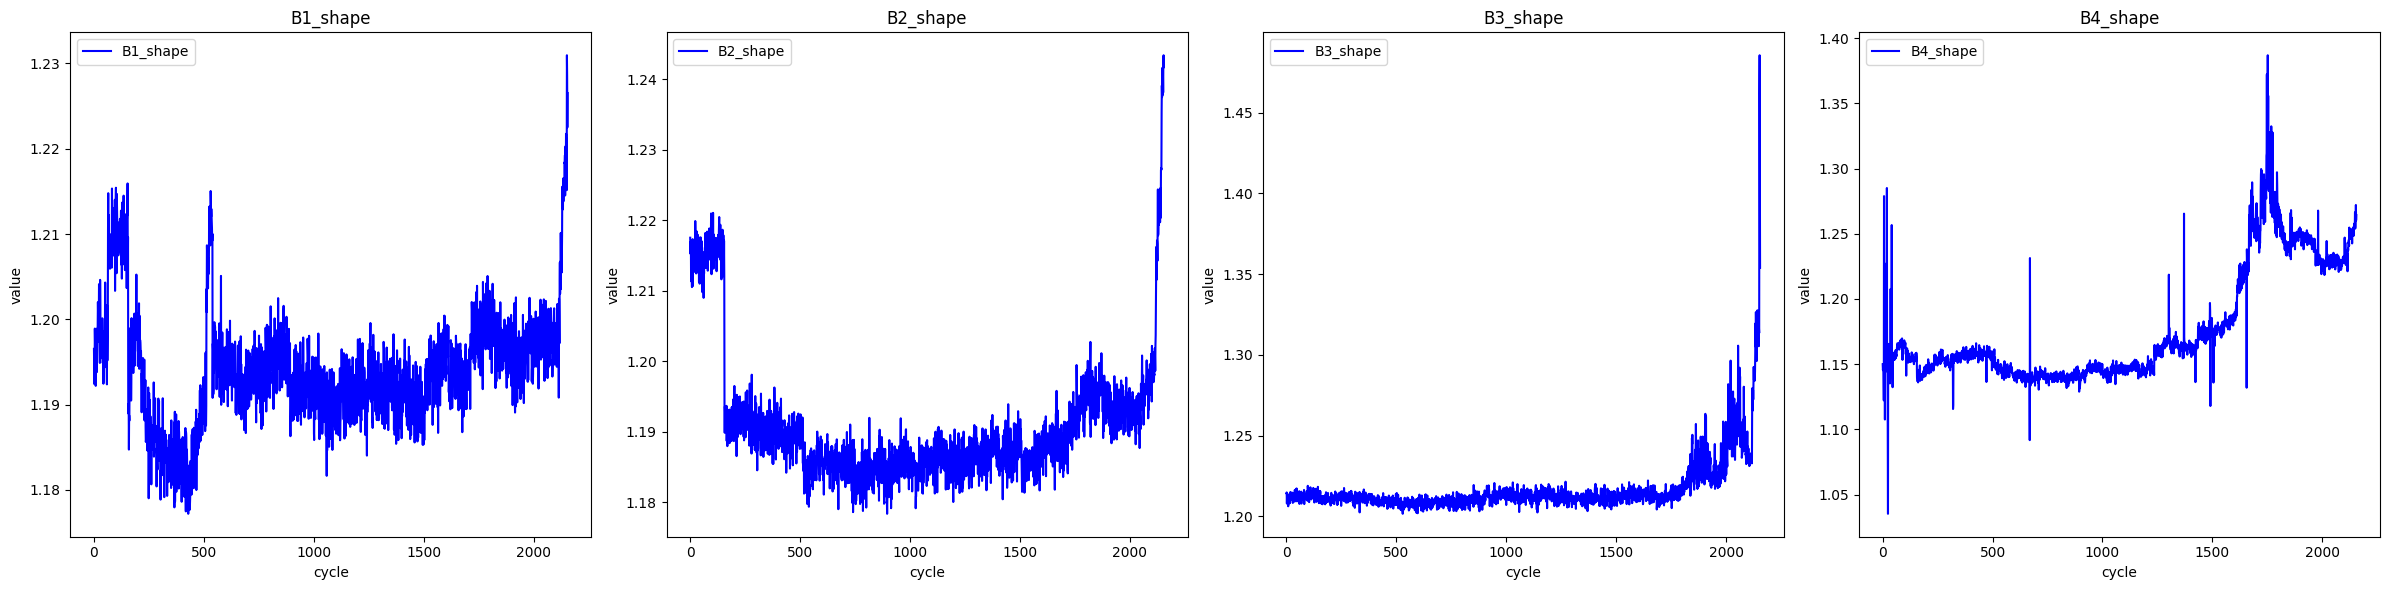

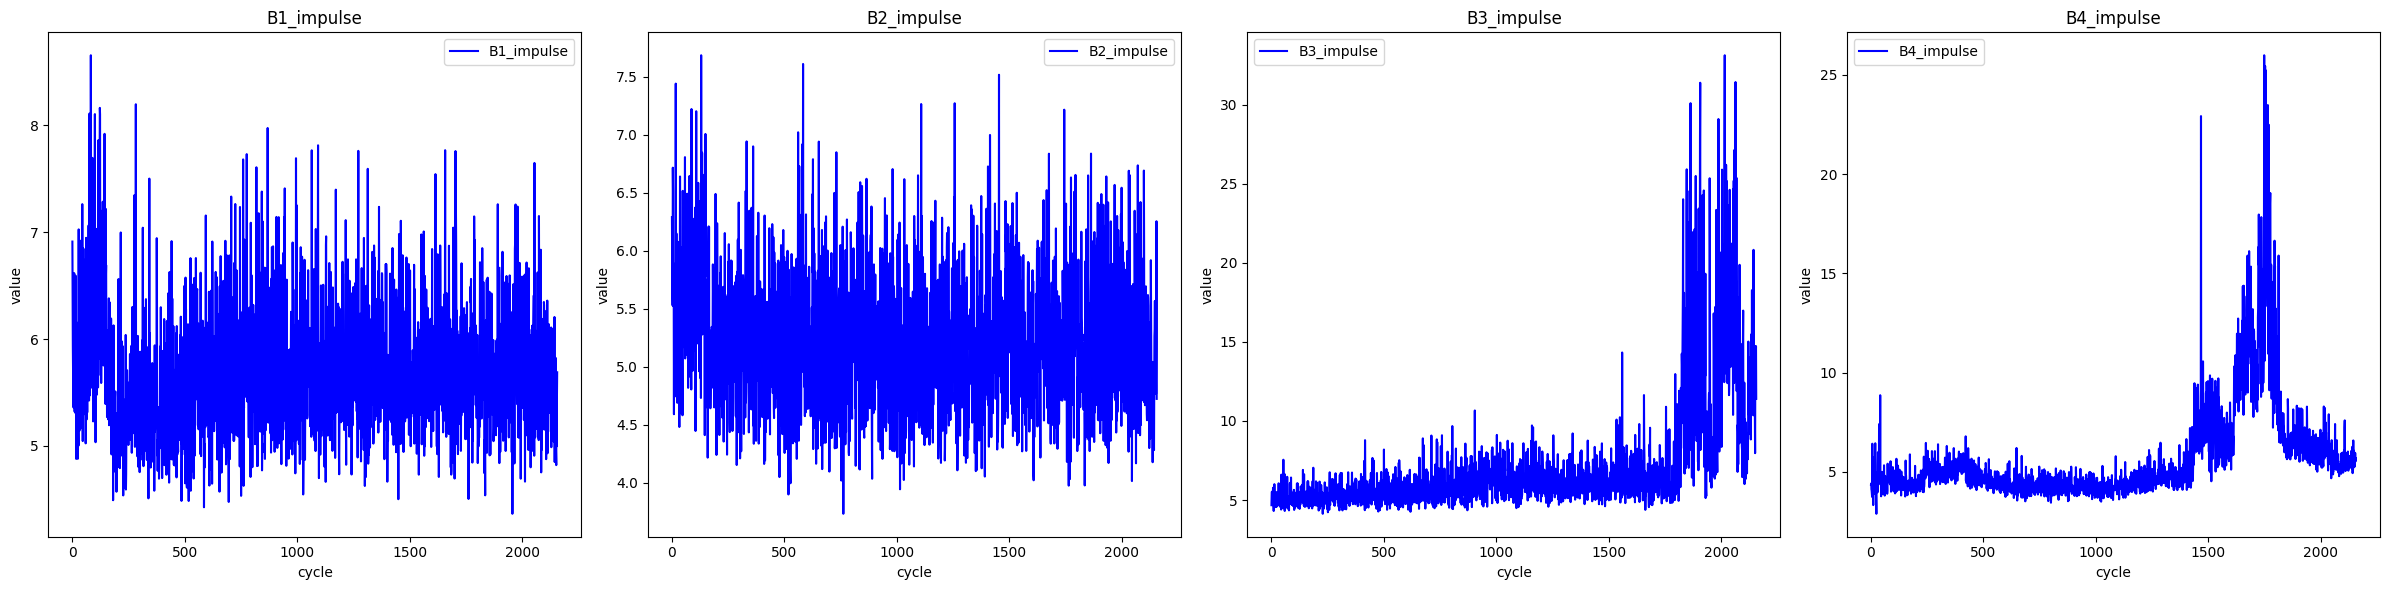

In [119]:
time_features_list = ["mean","std","skew","kurtosis","entropy","rms","max","p2p", "crest", "clearence", "shape", "impulse"]
bearings = ["B" + str(n) for n in range(1, 5)]
print("bearing detail", bearings)

for tf in time_features_list:
    fig = plt.figure(figsize=(24, 6))
    axes = []

    for i in range(4):
        ax = fig.add_subplot(1, 4, i + 1)
        axes.append(ax)

        col = bearings[i] + "_" + tf
        set1[col].plot(title="{}".format(col, tf), color = "blue", legend=True, ax=ax)
        ax.set(xlabel="cycle", ylabel="value")

    plt.tight_layout()
    plt.show()

bearing detail ['B1', 'B2', 'B3', 'B4']


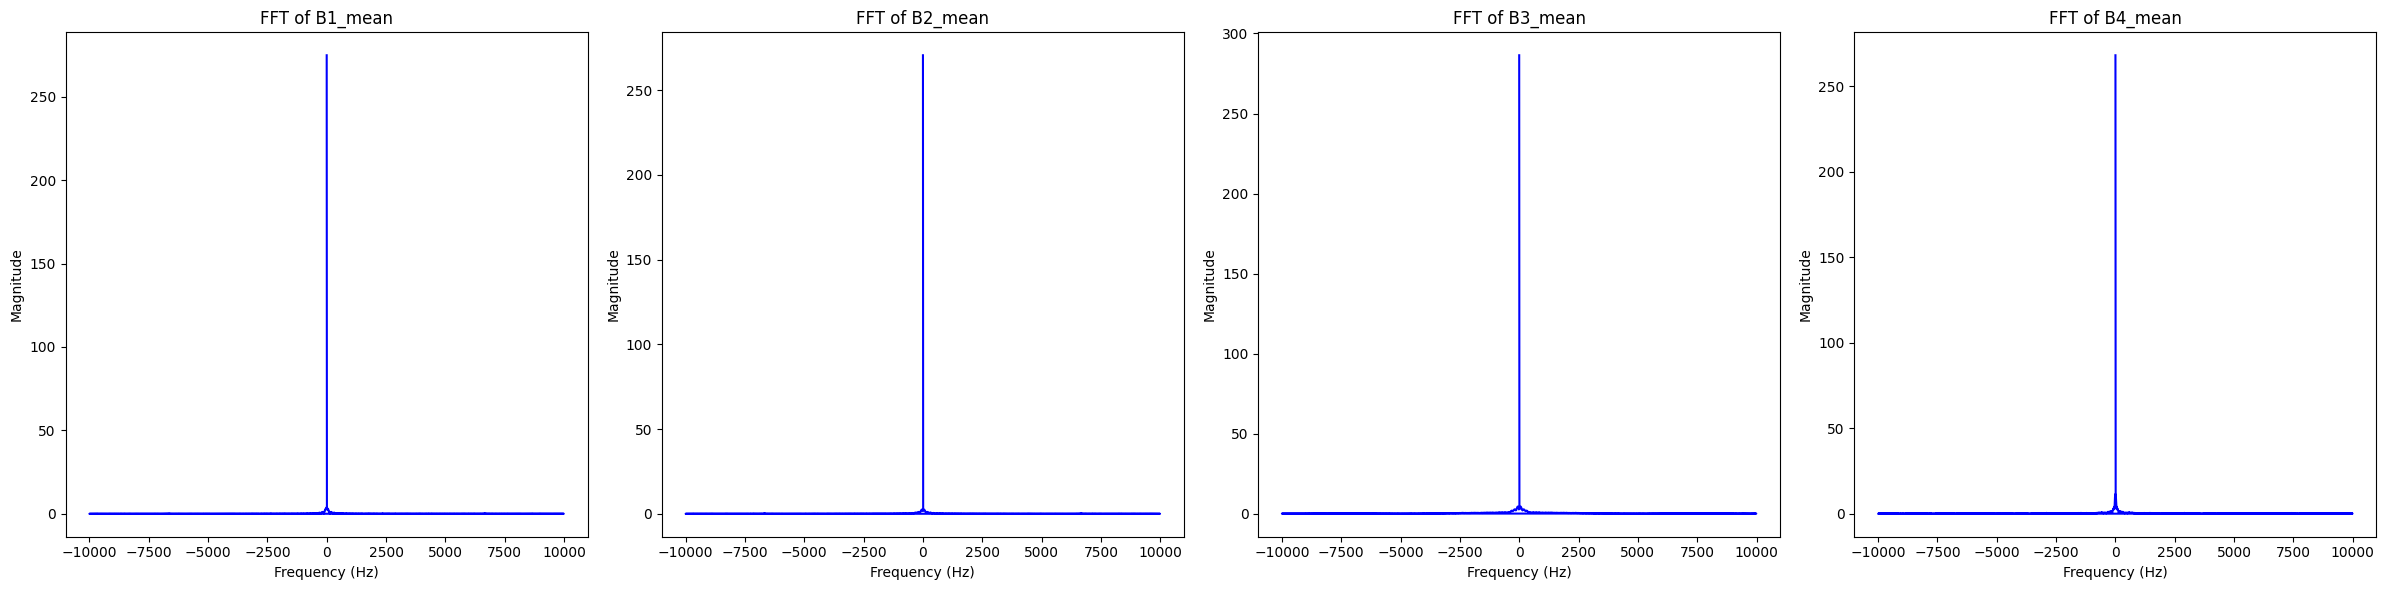

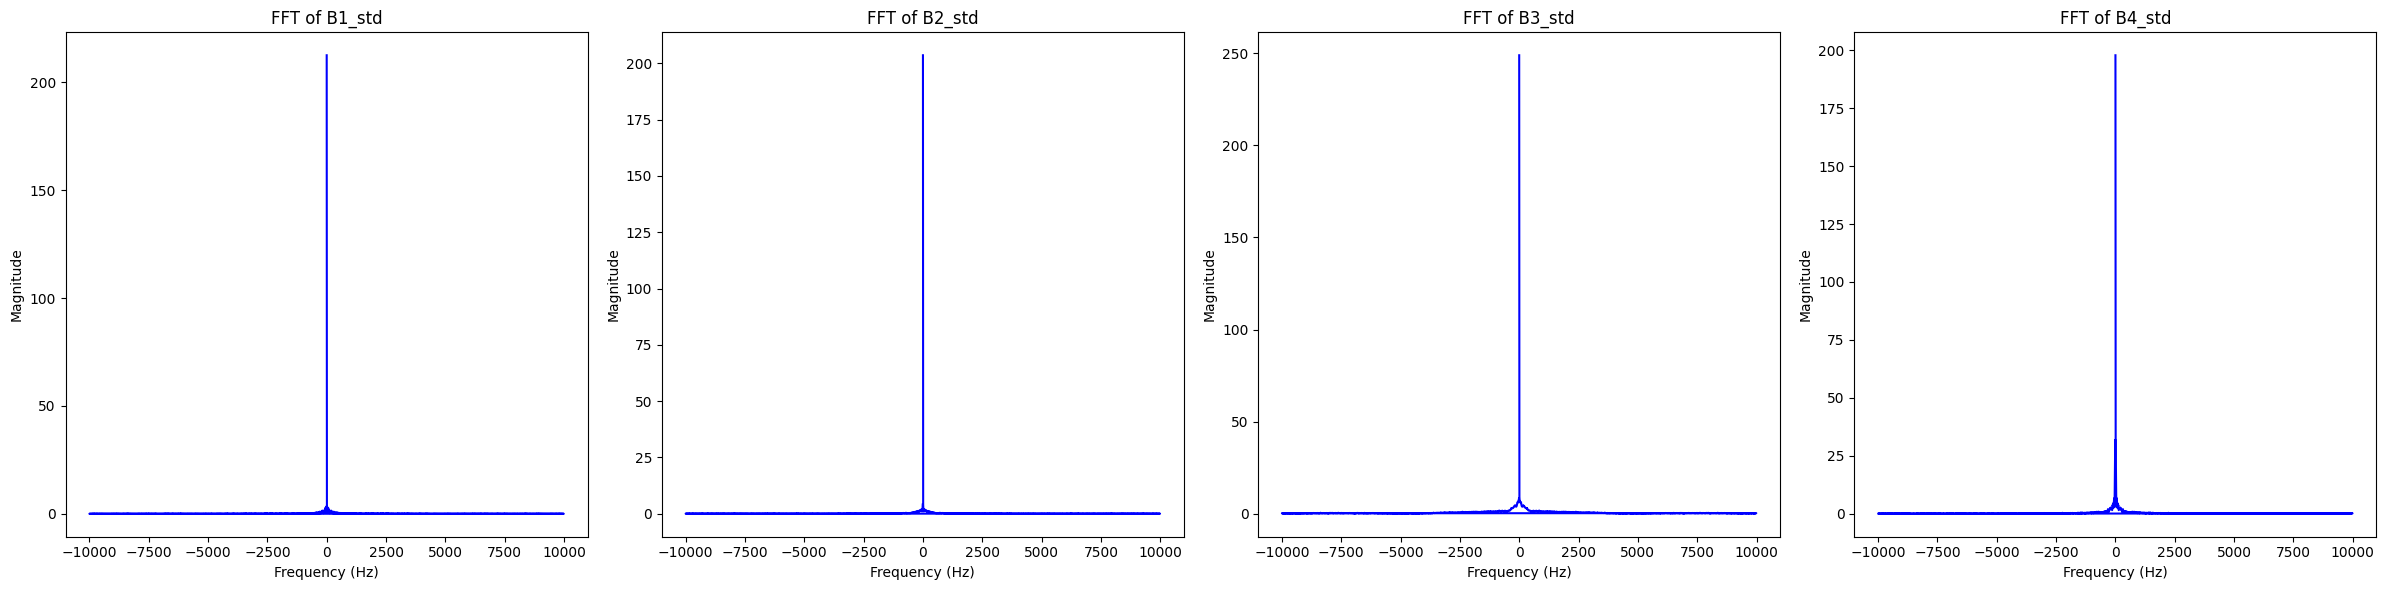

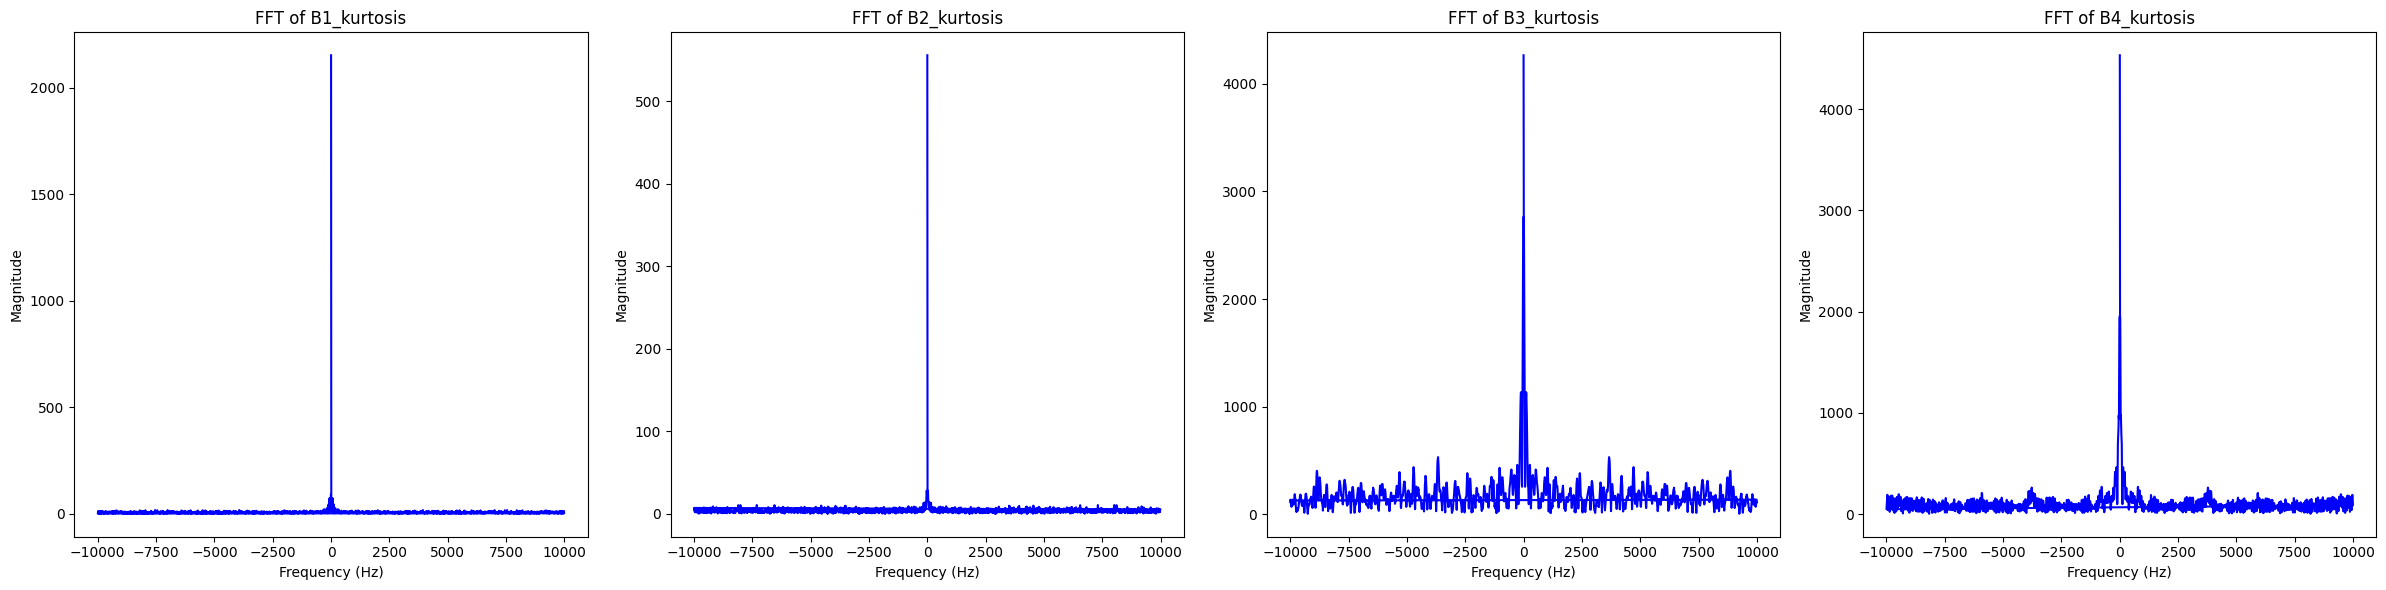

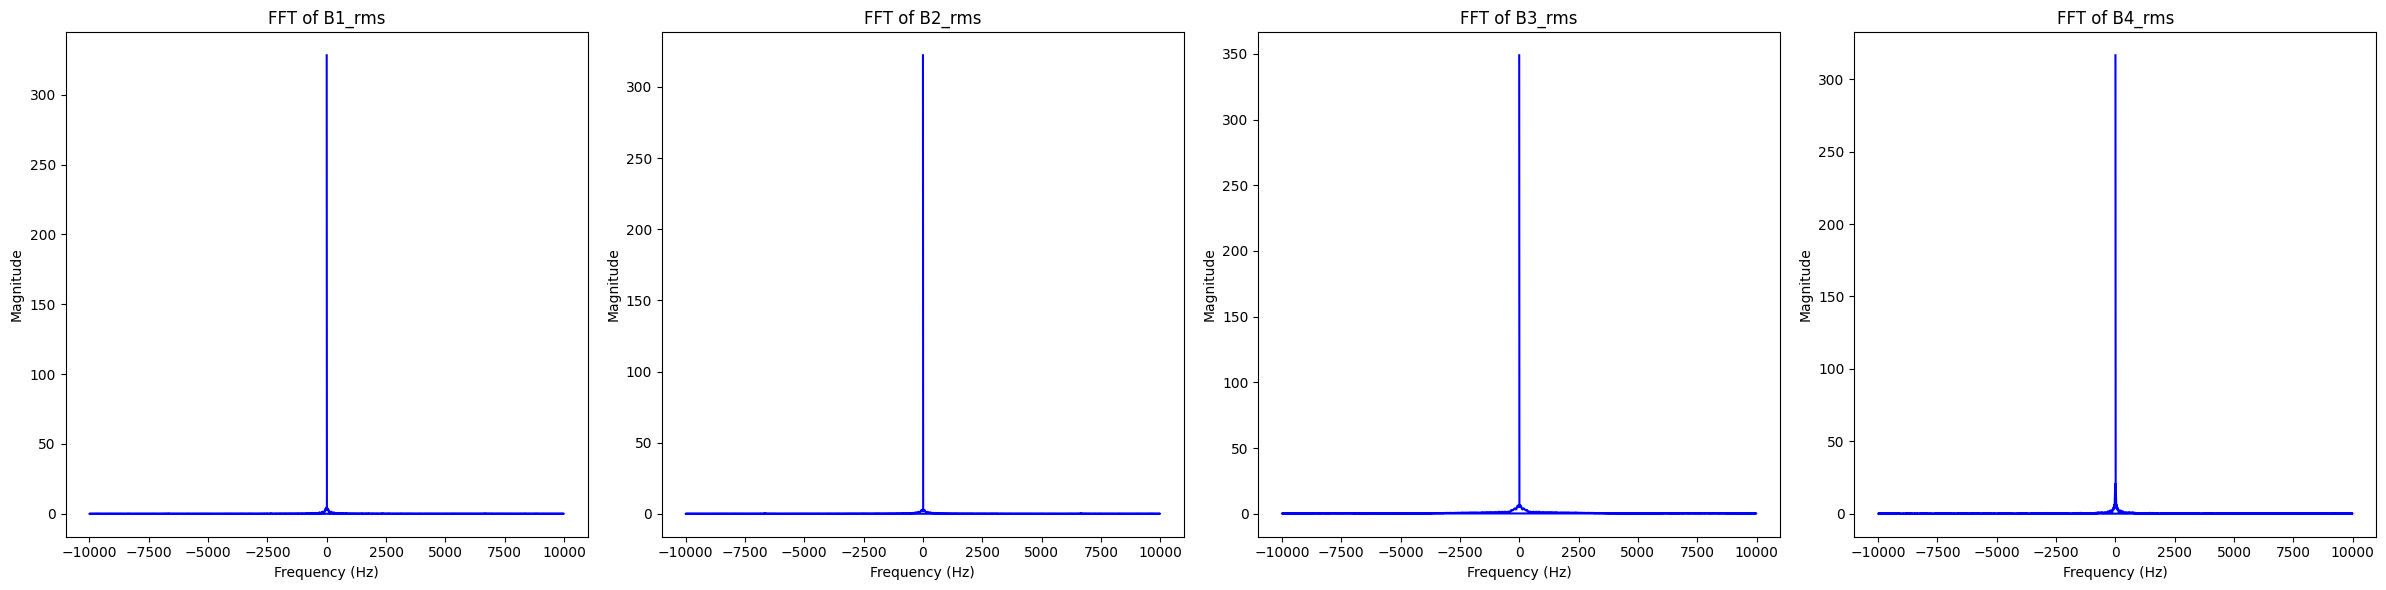

In [125]:
freq_features_list = ["mean", "std", "kurtosis", "rms"]
bearings = ["B" + str(n) for n in range(1, 5)]
print("bearing detail", bearings)

for ff in freq_features_list:
    fig = plt.figure(figsize=(24, 6))
    axes = []

    for i in range(4):
        ax = fig.add_subplot(1, 4, i + 1)
        axes.append(ax)

        col = bearings[i] + "_" + ff
        data = set1[col]
        n = len(data)
        sampling_rate = 20000  # Assuming unit sampling rate

        # Compute the FFT
        fft_values = np.fft.fft(data)
        freqs = np.fft.fftfreq(n, d=1/sampling_rate)
        magnitudes = np.abs(fft_values)
        
        ax.plot(freqs, magnitudes, color="blue")
        ax.set(title="FFT of {}".format(col), xlabel="Frequency (Hz)", ylabel="Magnitude")

    plt.tight_layout()
    plt.show()

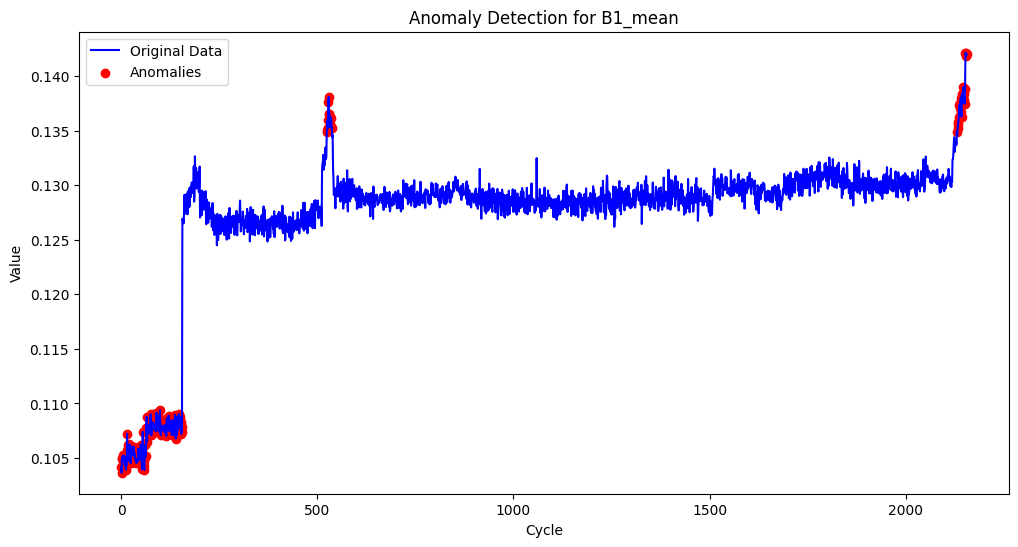

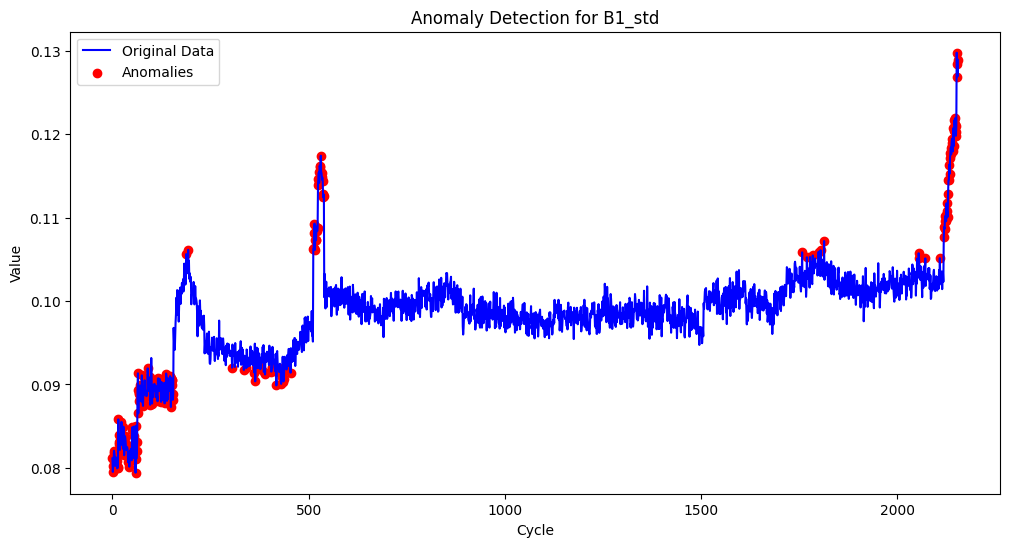

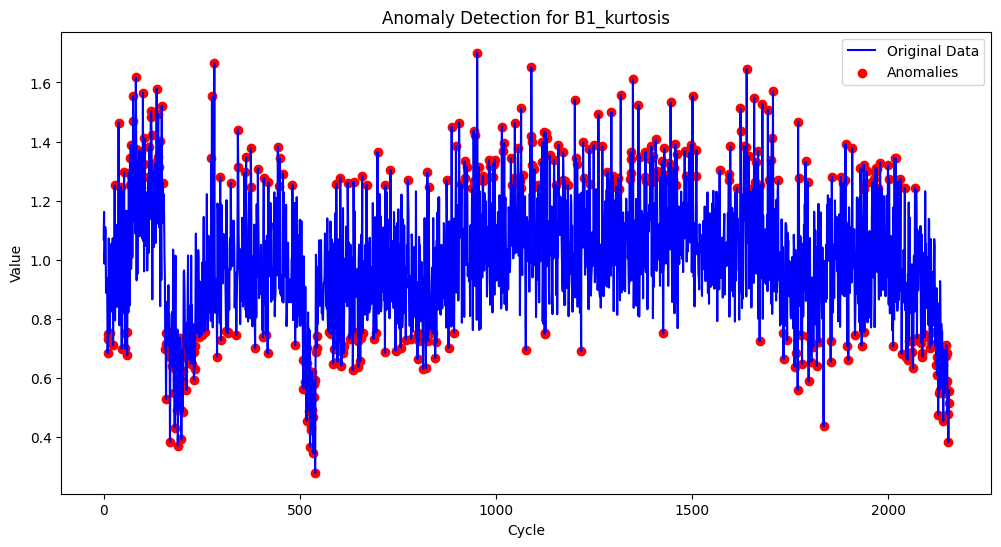

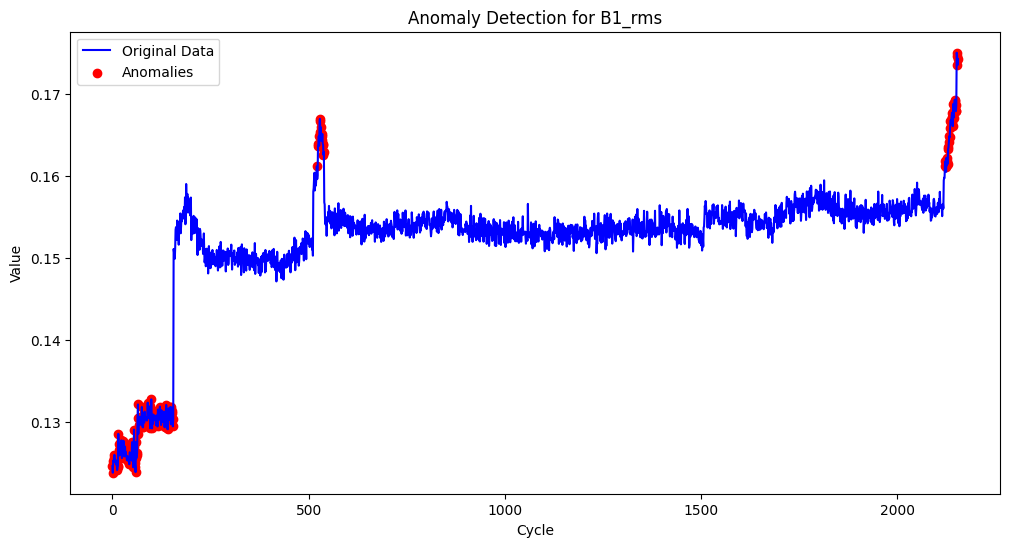

In [126]:
features_to_detect = ["mean", "std", "kurtosis", "rms"]  # Features to detect anomalies

# Set a threshold for anomaly detection
threshold = 1.22  # Adjust this based on your data and requirements

# Loop through each feature for anomaly detection
for feature in features_to_detect:
    col_name = "B1_" + feature  # Adjust the bearing as needed
    data = set1[col_name]

    # Calculate z-scores for the selected feature
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev

    # Identify anomalies based on the z-scores
    anomalies = np.abs(z_scores) > threshold

    # Plot the time series with anomalies highlighted
    plt.figure(figsize=(12, 6))
    plt.plot(data, label="Original Data", color="blue")
    plt.scatter(data.index[anomalies], data[anomalies], color="red", label="Anomalies")
    plt.xlabel("Cycle")
    plt.ylabel("Value")
    plt.title(f"Anomaly Detection for {col_name}")
    plt.legend()
    plt.show()

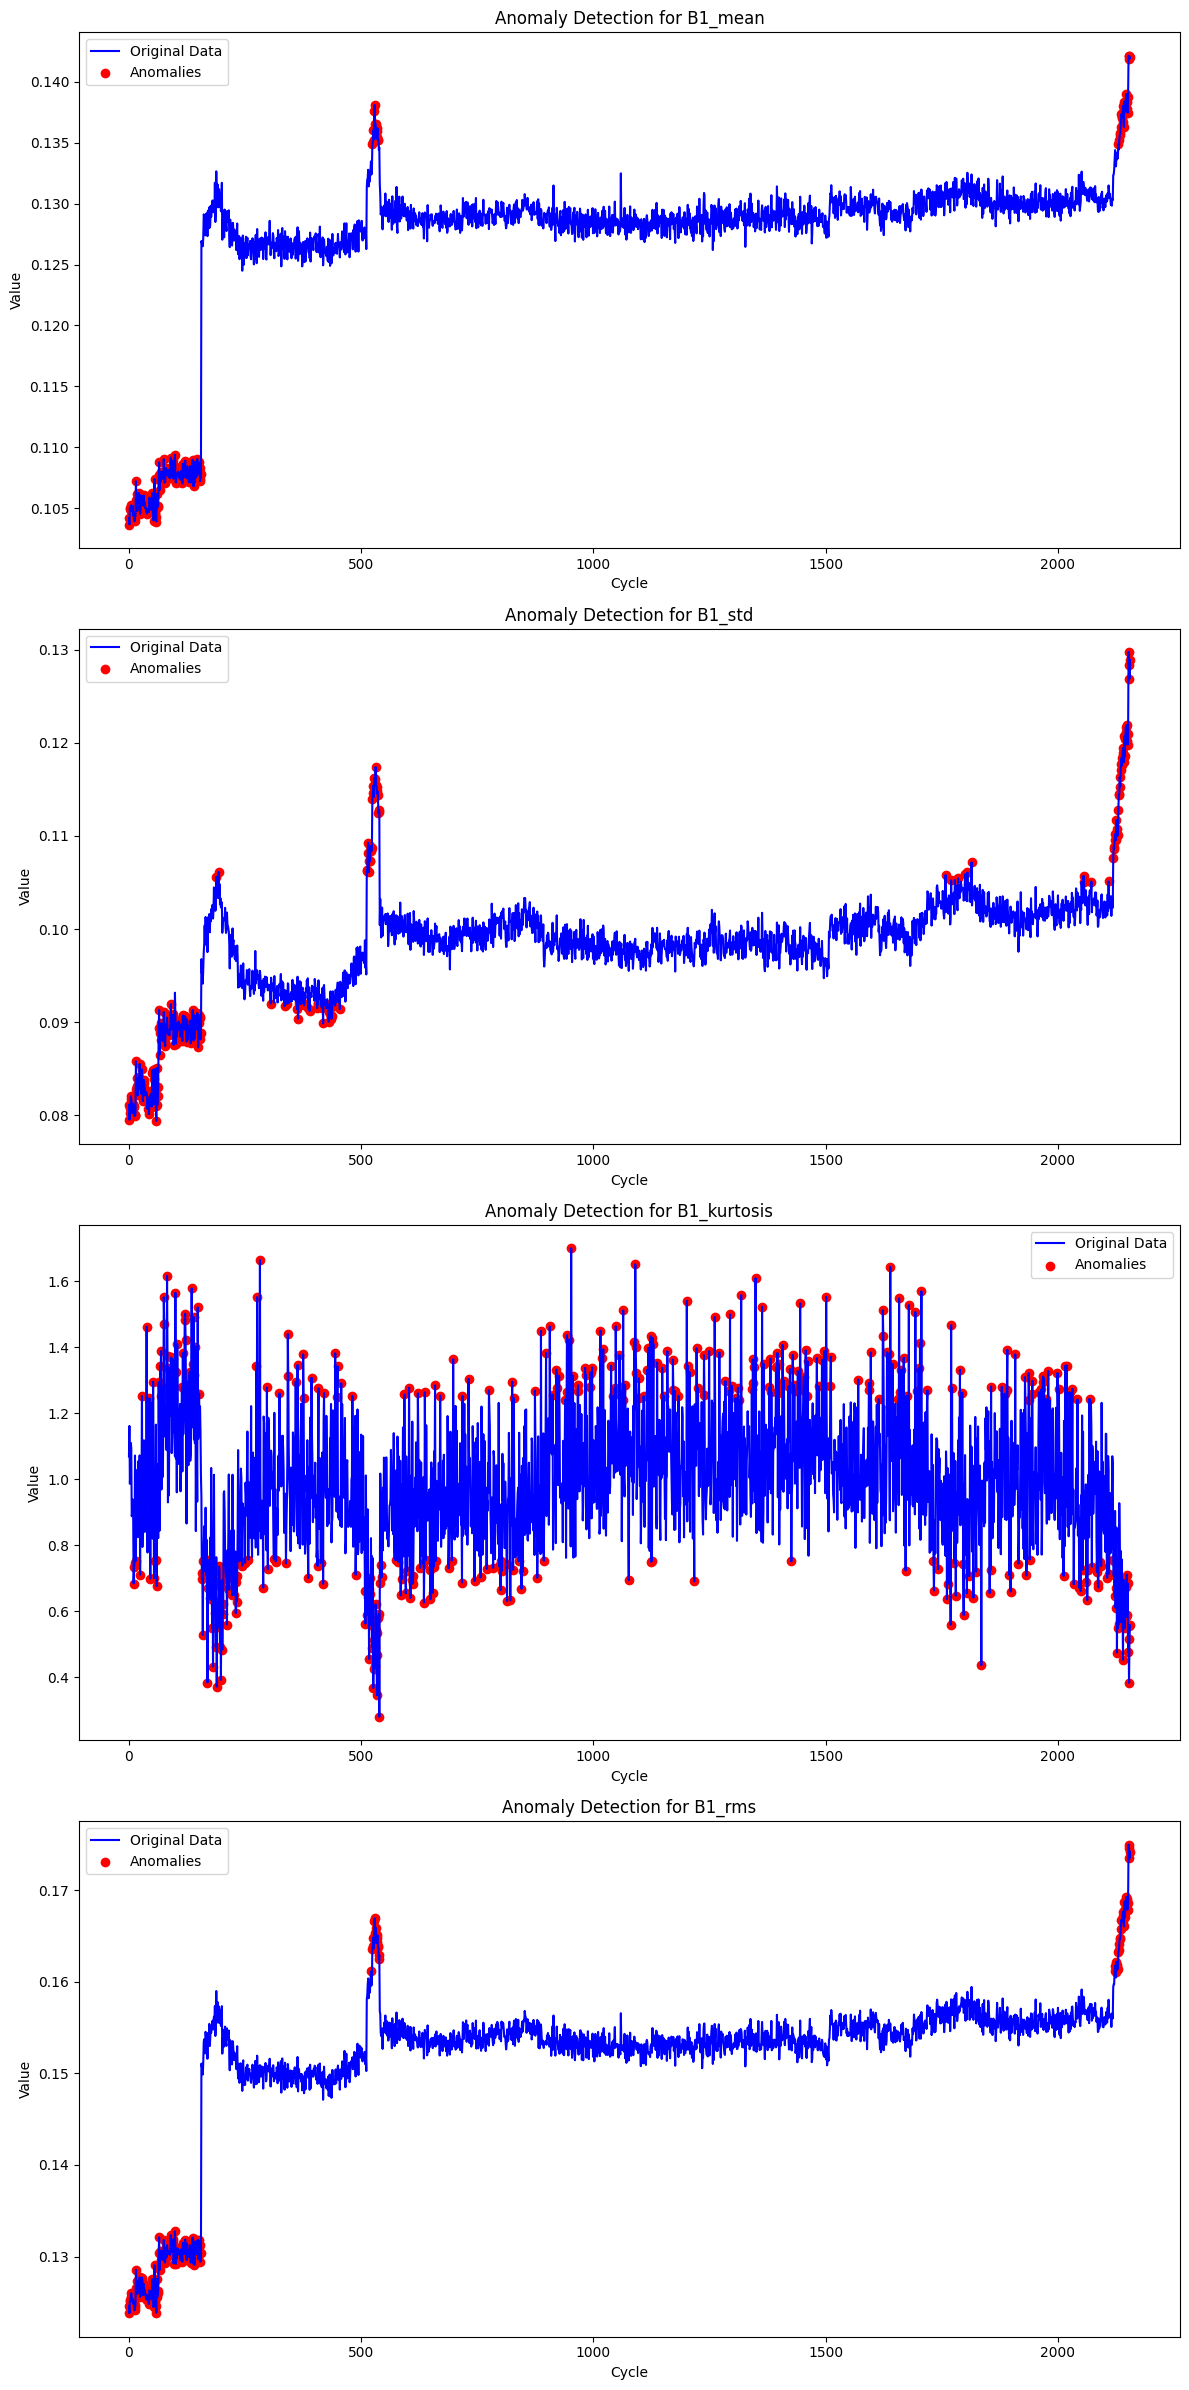

In [127]:
threshold = 1.22  # Adjust this based on your data and requirements

# Create a single figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_detect), ncols=1, figsize=(12, 24))

# Loop through each feature for anomaly detection
for idx, feature in enumerate(features_to_detect):
    col_name = "B1_" + feature  # Adjust the bearing as needed
    data = set1[col_name]

    # Calculate z-scores for the selected feature
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev

    # Identify anomalies based on the z-scores
    anomalies = np.abs(z_scores) > threshold

    # Plot the time series with anomalies highlighted in the subplot
    ax = axes[idx]
    ax.plot(data, label="Original Data", color="blue")
    ax.scatter(data.index[anomalies], data[anomalies], color="red", label="Anomalies")
    ax.set_xlabel("Cycle")
    ax.set_ylabel("Value")
    ax.set_title(f"Anomaly Detection for {col_name}")
    ax.legend()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

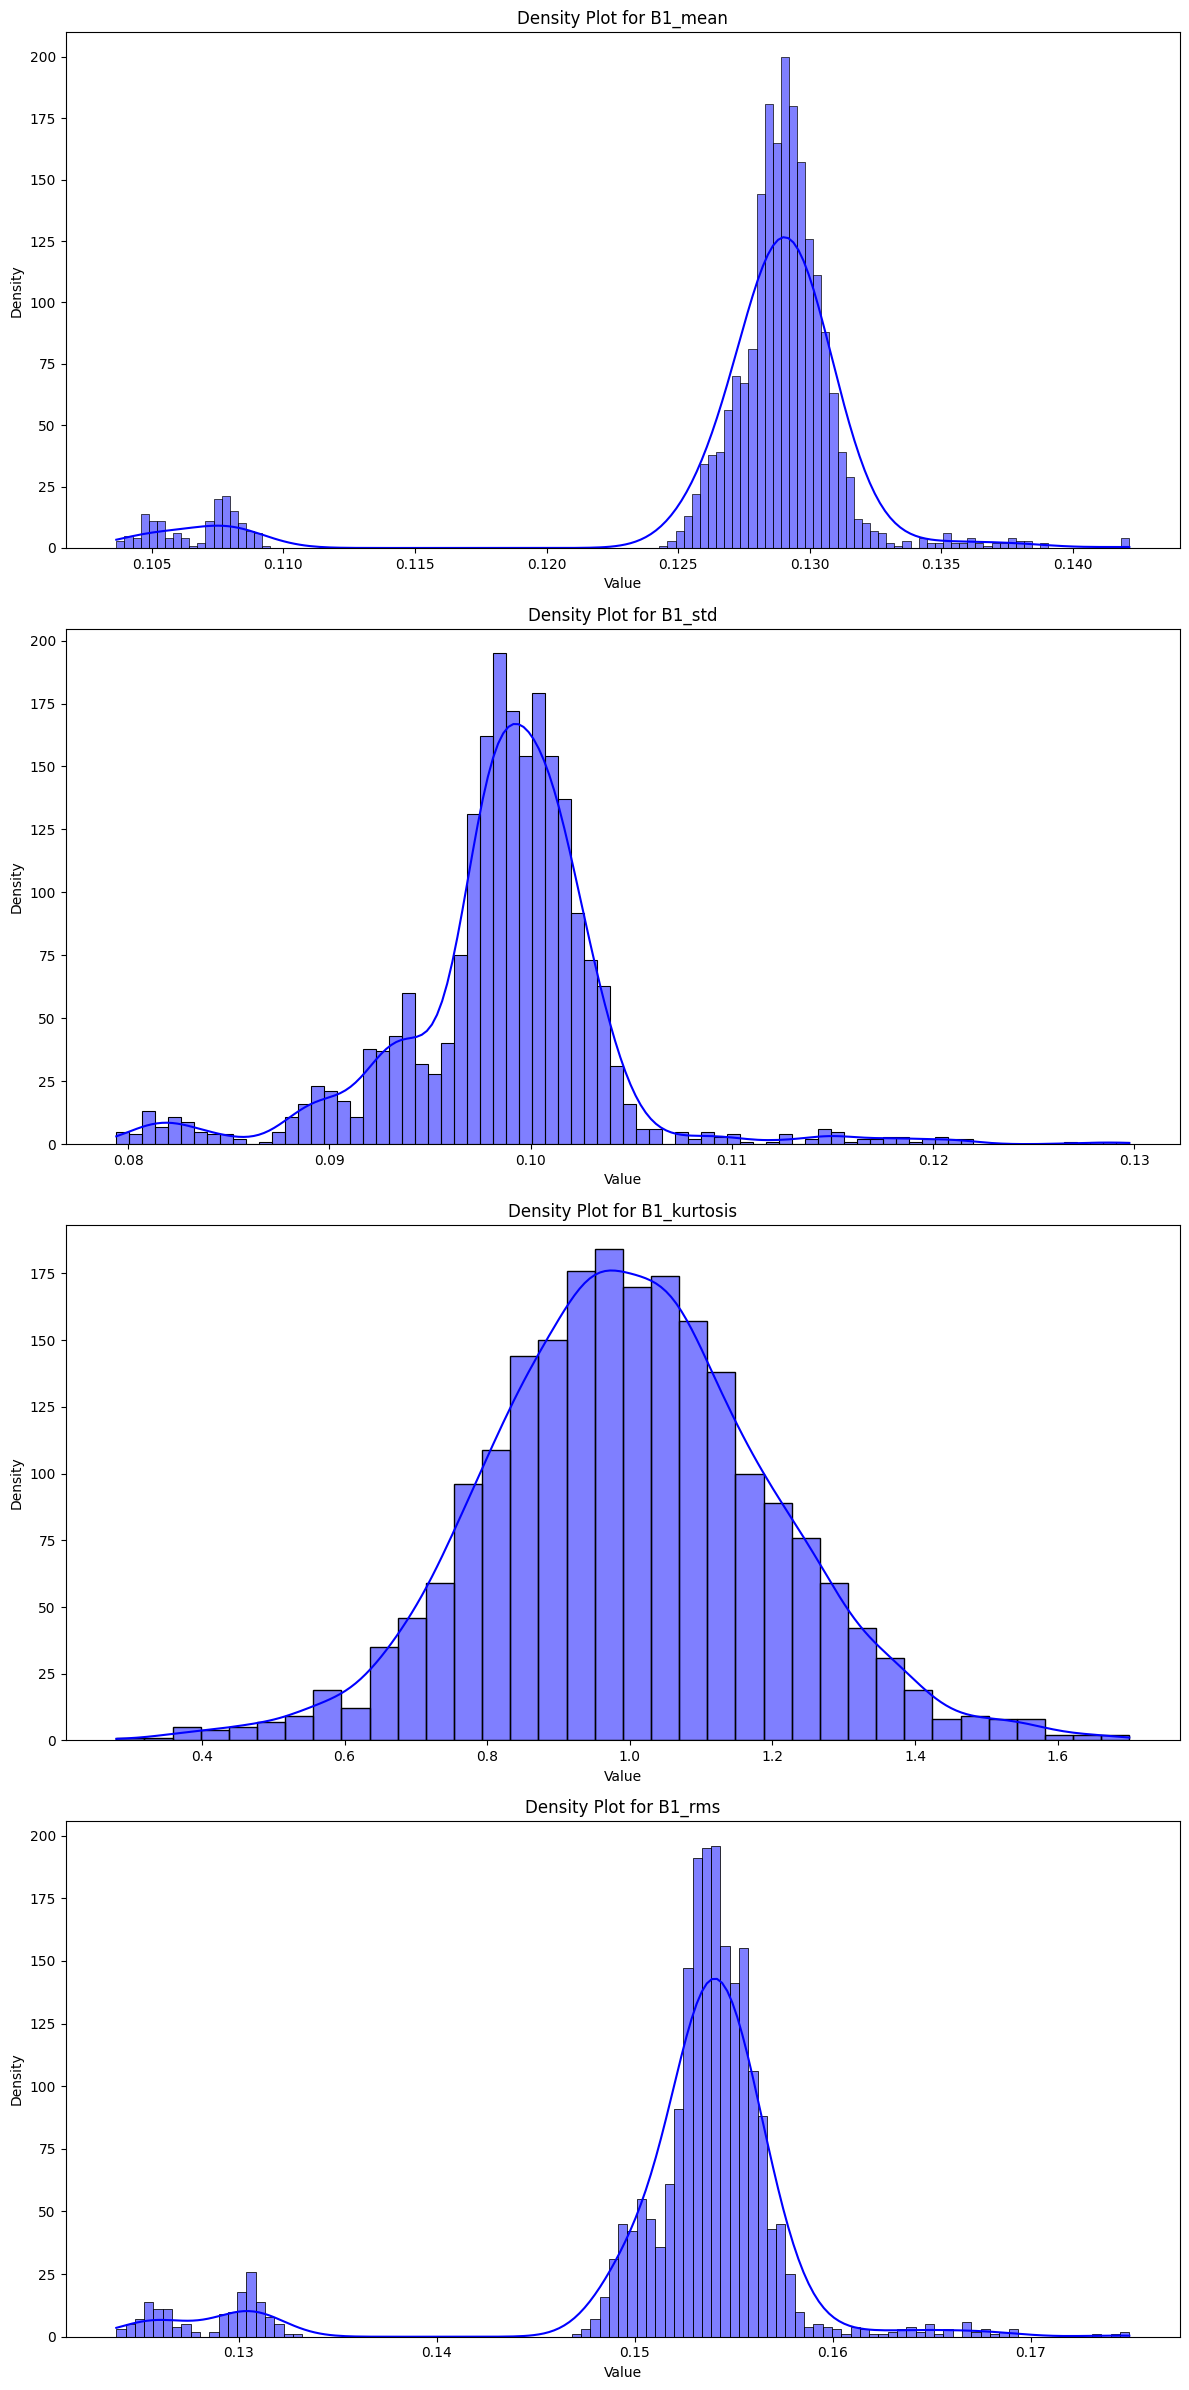

In [128]:
features_to_plot = ["mean", "std", "kurtosis", "rms"]

# Create a single figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 24))

# Loop through each feature for density plot
for idx, feature in enumerate(features_to_plot):
    col_name = "B1_" + feature  # Adjust the bearing as needed
    data = set1[col_name]

    # Create a density plot in the subplot
    ax = axes[idx]
    sns.histplot(data, kde=True, ax=ax, color="blue")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.set_title(f"Density Plot for {col_name}")

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Adding labels to the Dataframe

In [116]:
B1 ={
    "early" : ["2003-10-22 12:06:24" , "2003-10-23 09:14:13"],
    "suspect" : ["2003-10-23 09:24:13" , "2003-11-08 12:11:44"],
    "normal" : ["2003-11-08 12:21:44" , "2003-11-19 21:06:07"],
    "suspect_1" : ["2003-11-19 21:16:07" , "2003-11-24 20:47:32"],
    "imminent_failure" : ["2003-11-24 20:57:32","2003-11-25 23:39:56"]
}
B2 = {
    "early" : ["2003-10-22 12:06:24" , "2003-11-01 21:41:44"],
    "normal" : ["2003-11-01 21:51:44" , "2003-11-24 01:01:24"],
    "suspect" : ["2003-11-24 01:11:24" , "2003-11-25 10:47:32"],
    "imminent_failure" : ["2003-11-25 10:57:32" , "2003-11-25 23:39:56"]
}

B3 = {
    "early" : ["2003-10-22 12:06:24" , "2003-11-01 21:41:44"],
    "normal" : ["2003-11-01 21:51:44" , "2003-11-22 09:16:56"],
    "suspect" : ["2003-11-22 09:26:56" , "2003-11-25 10:47:32"],
    "Inner_race_failure" : ["2003-11-25 10:57:32" , "2003-11-25 23:39:56"]
}

B4 = {
    "early" : ["2003-10-22 12:06:24" , "2003-10-29 21:39:46"],
    "normal" : ["2003-10-29 21:49:46" , "2003-11-15 05:08:46"],
    "suspect" : ["2003-11-15 05:18:46" , "2003-11-18 19:12:30"],
    "Rolling_element_failure" : ["2003-11-19 09:06:09" , "2003-11-22 17:36:56"],
    "Stage_two_failure" : ["2003-11-22 17:46:56" , "2003-11-25 23:39:56"]
} 

In [117]:
B1_state = list()
B2_state = list()
B3_state = list()
B4_state = list()
cnt = 0

#for _ in set1.index:
for row in set1["time"]:
    cnt += 1
    # B1
    if cnt<=151:
        B1_state.append("early")
    if 151 < cnt <=600:
        B1_state.append("suspect")
    if 600 < cnt <=1499:
        B1_state.append("normal")
    if 1499 < cnt <=2098:
        B1_state.append("suspect")
    if 2098 < cnt <= 2156:
        B1_state.append("imminent_failure")
    #B2
    if cnt<=500:
        B2_state.append("early")
    if 500 < cnt <=2000:
        B2_state.append("normal")
    if 2000 < cnt <=2120:
        B2_state.append("suspect")
    if 2120< cnt <=2156:
        B2_state.append("imminent_failure")

    #B3
    if cnt<=500:
        B3_state.append("early")
    if 500 < cnt <= 1790:
        B3_state.append("normal")
    if 1790 < cnt <=2120:
        B3_state.append("suspect")
    if 2120 < cnt <=2156:
        B3_state.append("Inner_race_failure")
    #B4
    if cnt<=200:
        B4_state.append("early")
    if 200 < cnt <=1000:
        B4_state.append("normal")
    if 1000 < cnt <= 1435:
        B4_state.append("suspect")
    if 1435 < cnt <=1840:
        B4_state.append("Inner_race_failure")
    if 1840 < cnt <=2156:
        B4_state.append("Stage_two_failure")
#controlling the counts
from collections import Counter
print(Counter(B1_state))
print(Counter(B2_state))
print(Counter(B3_state))
print(Counter(B4_state))

set1["B1_state"] = B1_state
set1["B2_state"] = B2_state
set1["B3_state"] = B3_state
set1["B4_state"] = B4_state

set1.head()

Counter({'suspect': 1048, 'normal': 899, 'early': 151, 'imminent_failure': 58})
Counter({'normal': 1500, 'early': 500, 'suspect': 120, 'imminent_failure': 36})
Counter({'normal': 1290, 'early': 500, 'suspect': 330, 'Inner_race_failure': 36})
Counter({'normal': 800, 'suspect': 435, 'Inner_race_failure': 405, 'Stage_two_failure': 316, 'early': 200})


,time,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse,B1_state,B2_state,B3_state,B4_state
0,2003-10-22 12:06:24,0.104148,0.081124,-0.029900,1.069800,4.803057,0.124617,0.720,1.108,5.777714,...,0.413,0.662,3.788316,0.085565,1.149963,4.356424,early,early,early,early
1,2003-10-22 12:09:13,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,5.282223,...,0.420,0.796,3.856749,0.086097,1.145471,4.417794,early,early,early,early
2,2003-10-22 12:14:13,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,4.974097,...,0.396,0.657,3.589548,0.086970,1.147284,4.118232,early,early,early,early
3,2003-10-22 12:19:13,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,4.776357,...,0.393,0.591,3.539320,0.087623,1.146925,4.059336,early,early,early,early
4,2003-10-22 12:24:13,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,4.959370,...,0.376,0.591,3.412315,0.087316,1.143544,3.902132,early,early,early,early


In [118]:
B1_cols = [col for col in set1.columns if "B1" in col]
B2_cols = [col for col in set1.columns if "B2" in col]
B3_cols = [col for col in set1.columns if "B3" in col]
B4_cols = [col for col in set1.columns if "B4" in col]

B1 = set1[B1_cols]
B2 = set1[B2_cols]
B3 = set1[B3_cols]
B4 = set1[B4_cols]
cols = ['B_mean','B_std','B_skew','B_kurtosis','B_entropy','B_rms','B_max','B_p2p','B_crest', 'B_clearence', 'B_shape', 'B_impulse',
        'class']
B1.columns = cols
B2.columns = cols
B3.columns = cols
B4.columns = cols
final_data = pd.concat([B1,B2,B3,B4], axis=0, ignore_index=True)
final_data.describe()
final_data.head()


,B_mean,B_std,B_skew,B_kurtosis,B_entropy,B_rms,B_max,B_p2p,B_crest,B_clearence,B_shape,B_impulse,class
0,0.104148,0.081124,-0.029900,1.069800,4.803057,0.124617,0.720,1.108,5.777714,0.090932,1.196537,6.913248,early
1,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,5.282223,0.090784,1.194500,6.309617,early
2,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,4.974097,0.092058,1.192407,5.931146,early
3,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,4.776357,0.091833,1.193516,5.700660,early
4,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,4.959370,0.091479,1.198917,5.945870,early
